### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Filter warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Setting display options

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

pd.options.display.float_format = '{:,.4f}'.format

## Step 1: Reading and Understanding of data

In [5]:
data_dict = pd.read_csv('data_dictionary.csv')
data_dict

Acronyms                                        Description
0     CIRCLE_ID  Telecom circle area to which the customer belo...
1           LOC            Local calls  within same telecom circle
2           STD              STD calls  outside the calling circle
3            IC                                     Incoming calls
4            OG                                     Outgoing calls
5           T2T  Operator T to T ie within same operator mobile...
6       T2M                    Operator T to other operator mobile
7       T2O                Operator T to other operator fixed line
8       T2F                         Operator T to fixed lines of T
9       T2C                      Operator T to its own call center
10     ARPU                               Average revenue per user
11      MOU                          Minutes of usage  voice calls
12      AON      Age on network  number of days the customer is...
13     ONNET     All kind of calls within the same operator net...
14   OFFNET       All kind of calls outside the operator T network
15         ROAM  Indicates that customer is in roaming zone dur...
16       SPL                                         Special calls
17      ISD                                              ISD calls
18     RECH                                               Recharge
19      NUM                                                 Number
20      AMT                               Amount in local currency
21      MAX                                                Maximum
22     DATA                                        Mobile internet
23       3G                                              G network
24       AV                                                Average
25      VOL                     Mobile internet usage volume in MB
26       2G                                              G network
27      PCK                  Prepaid service schemes called  PACKS
28    NIGHT         Scheme to use during specific night hours only
29  MONTHLY      Service schemes with validity equivalent to a ...
30    SACHET     Service schemes with validity smaller than a m...
31      *.6                              KPI for the month of June
32      *.7                              KPI for the month of July
33      *.8                            KPI for the month of August
34      FB_USER  Service scheme to avail services of Facebook a...
35      VBC      Volume based cost  when no specific scheme is ...

In [6]:
# Reading the train data into a dataframe

train_data = pd.read_csv('train.csv')
train_data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109          0.0000          0.0000          0.0000   
1   1        109          0.0000          0.0000          0.0000   
2   2        109          0.0000          0.0000          0.0000   
3   3        109          0.0000          0.0000          0.0000   
4   4        109          0.0000          0.0000          0.0000   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014  31.2770   
1            6/30/2014            7/31/2014            8/31/2014   0.0000   
2            6/30/2014            7/31/2014            8/31/2014  60.8060   
3            6/30/2014            7/31/2014            8/31/2014 156.3620   
4            6/30/2014            7/31/2014            8/31/2014 240.7080   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  87.0090   7.5270      48.5800     124.3800       1.2900       32.2400   
1 122.7870  42.9530       0.0000       0.0000       0.0000        0.0000   
2 103.1760   0.0000       0.5300      15.9300       0.0000       53.9900   
3 205.2600 111.0950       7.2600      16.0100       0.0000       68.7600   
4 128.1910 101.5650      21.2800       4.8300       6.1300       56.9900   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0       96.6800        2.3300         0.0000         0.0000         0.0000   
1       25.9900       30.8900         0.0000         0.0000         0.0000   
2       82.0500        0.0000         0.0000         0.0000         0.0000   
3       78.4800       50.2300         0.0000         0.0000         0.0000   
4       38.1100        9.6300        53.6400         0.0000         0.0000   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0         0.0000         0.0000         0.0000            2.2300   
1         0.0000         0.0000         0.0000            0.0000   
2         0.0000         0.0000         0.0000            0.5300   
3         0.0000         0.0000         1.6300            6.9900   
4        15.7300         0.0000         0.0000           10.1600   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0            0.0000            0.2800            5.2900           16.0400   
1            0.0000            0.0000            0.0000            0.0000   
2           12.9800            0.0000           24.1100            0.0000   
3            3.9400            0.0000           37.9100           44.8900   
4            4.8300            6.1300           36.7400           19.8800   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0            2.3300            0.0000            0.0000            0.0000   
1            0.0000            0.0000            0.0000            0.0000   
2            0.0000            0.0000            0.0000            0.0000   
3           23.6300            0.0000            0.0000            0.0000   
4            4.6100           11.9900            1.2300            5.0100   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0            0.0000            0.0000            0.0000        7.5300   
1            0.0000           22.0100           29.7900        0.0000   
2            2.1400            0.0000            0.0000       24.6400   
3            0.0000            0.0000            8.0300       44.9100   
4            0.0000            9.8500            0.0000       58.9100   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0       16.0400        2.6100           46.3400          124.3800   
1        0.0000        0.0000            0.0000            0.0000   
2       12.9800        0.0000            0.0000            2.9400   
3       48.8400       23.6300            0.2600           12.0600   
4       25.9400       15.7600            0.0000            0.0000   

   std_og_t2t_mo

In [7]:
# Renaming the column - churn_probability

train_data.rename(columns={'churn_probability':'churn'}, inplace=True)

In [8]:
# Shape of the dataframe

train_data.shape

(69999, 172)

#### Observations:

- There are total 69999 rows and 172 columns
- Churn is the target variable

In [9]:
# data types of the columns

train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

#### Observations:

- The dataset predominantly comprises numerical columns, with the majority being integers or floating-point numbers. There are only a handful of columns categorized as objects, which we'll now analyze further.

In [10]:
# Statistical Data

train_data.describe()

id   circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
count 69,999.0000 69,999.0000     69,297.0000     69,297.0000     69,297.0000   
mean  34,999.0000    109.0000          0.0000          0.0000          0.0000   
std   20,207.1151      0.0000          0.0000          0.0000          0.0000   
min        0.0000    109.0000          0.0000          0.0000          0.0000   
25%   17,499.5000    109.0000          0.0000          0.0000          0.0000   
50%   34,999.0000    109.0000          0.0000          0.0000          0.0000   
75%   52,498.5000    109.0000          0.0000          0.0000          0.0000   
max   69,998.0000    109.0000          0.0000          0.0000          0.0000   

           arpu_6      arpu_7      arpu_8  onnet_mou_6  onnet_mou_7  \
count 69,999.0000 69,999.0000 69,999.0000  67,231.0000  67,312.0000   
mean     283.1344    278.1859    278.8588     133.1533     133.8944   
std      334.2139    344.3669    351.9243     299.9631     311.2772   
min   -2,258.7090 -1,289.7150   -945.8080       0.0000       0.0000   
25%       93.5810     86.7140     84.0950       7.4100       6.6750   
50%      197.4840    191.5880    192.2340      34.1100      32.2800   
75%      370.7910    365.3695    369.9090     119.3900     115.8375   
max   27,731.0880 35,145.8340 33,543.6240   7,376.7100   8,157.7800   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  66,296.0000   67,231.0000   67,312.0000   66,296.0000    67,231.0000   
mean      132.9783      198.8748      197.1534      196.5436         9.7654   
std       311.8966      316.8184      322.4822      324.0892        57.3744   
min         0.0000        0.0000        0.0000        0.0000         0.0000   
25%         6.4100       34.8600       32.2400       31.5750         0.0000   
50%        32.1000       96.4800       91.8850       91.8000         0.0000   
75%       115.0600      232.9900      227.6300      229.3450         0.0000   
max    10,752.5600    8,362.3600    7,043.9800   14,007.3400     2,850.9800   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count    67,312.0000    66,296.0000    67,231.0000    67,312.0000   
mean          7.0146         7.0049        14.1865         9.8422   
std          55.9610        53.4081        73.4693        58.5119   
min           0.0000         0.0000         0.0000         0.0000   
25%           0.0000         0.0000         0.0000         0.0000   
50%           0.0000         0.0000         0.0000         0.0000   
75%           0.0000         0.0000         0.0000         0.0000   
max       4,155.8300     4,169.8100     3,775.1100     2,812.0400   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count    66,296.0000       67,231.0000       67,312.0000       66,296.0000   
mean          9.7718           46.9049           46.1665           45.6861   
std          64.6184          150.9718          154.7390          153.7169   
min           0.0000            0.0000            0.0000            0.0000   
25%           0.0000            1.6600            1.6500            1.6100   
50%           0.0000           11.9100           11.5800           11.7400   
75%           0.0000           40.7400           39.7600           39.8950   
max       5,337.0400        6,431.3300        7,400.6600       10,752.5600   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count       67,231.0000       67,312.0000       66,296.0000       67,231.0000   
mean            93.2382           90.7992           91.1214            3.7432   
std            162.0467          153.8526          152.9978           13.3195   
min              0.0000            0.0000            0.0000            0.0000   
25%              9.9200           10.0900            9.8300            0.0000   
50%             41.0300           40.1700           40.3500            0.0000   
75%            110.4300          107.5400

#### Observations:

- Some columns contain only one unique value, rendering them irrelevant for model building. Additionally, certain columns exhibit significant disparities between the 75th percentile and the maximum value, suggesting the presence of outliers.


In [11]:
# Reading the test data into a dataframe

test_data = pd.read_csv('test.csv')
test_data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109          0.0000          0.0000          0.0000   
1  70000        109          0.0000          0.0000          0.0000   
2  70001        109          0.0000          0.0000          0.0000   
3  70002        109          0.0000          0.0000          0.0000   
4  70003        109          0.0000          0.0000          0.0000   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014  91.8820   
1            6/30/2014            7/31/2014            8/31/2014 414.1680   
2            6/30/2014            7/31/2014            8/31/2014 329.8440   
3            6/30/2014            7/31/2014            8/31/2014  43.5500   
4            6/30/2014            7/31/2014            8/31/2014 306.8540   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  65.3300  64.4450      31.7800      20.2300      23.1100       60.1600   
1 515.5680 360.8680      75.5100      41.2100      19.8400      474.3400   
2 434.8840 746.2390       7.5400       7.8600       8.4000       16.9800   
3 171.3900  24.4000       5.3100       2.1600       0.0000       40.0400   
4 406.2890 413.3290     450.9300     609.0300     700.6800       60.9400   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0       32.1600       34.8300         0.0000         0.0000         0.0000   
1      621.8400      394.9400         0.0000         0.0000         0.0000   
2       45.8100       45.0400        22.8100       103.3800        26.0800   
3      205.0100       24.0100         0.0000         0.0000         0.0000   
4       23.8400       74.1600         0.0000         0.0000         0.0000   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0         0.0000         0.0000         0.0000           24.8800   
1         0.0000         0.0000         0.0000           75.5100   
2        24.5300        53.6800        54.4400            0.0000   
3         0.0000         0.0000         0.0000            5.3100   
4         0.0000         0.0000         0.0000            0.4500   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0           20.2300           21.0600           18.1300           10.8900   
1           41.2100           19.8400          473.6100          598.0800   
2            0.0000            0.0000            0.0000            0.0000   
3            0.0000            0.0000            2.9400           98.6100   
4            0.7800           14.5600            2.3900            2.6600   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0            8.3600            0.0000           13.5800            0.0000   
1          377.2600            0.7300            0.0000            0.0000   
2            0.0000            0.0000            0.0000            0.0000   
3           20.5100            0.0000            0.0000            2.3500   
4           10.9400            0.0000            0.0000            0.0000   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0            0.0000            0.0000            0.0300       43.0100   
1            0.0000            0.0000            0.0000      549.8600   
2            0.0000            0.0000            0.0000        0.0000   
3            0.0000            6.1800            0.0000        8.2600   
4            0.0000            0.0000            0.0000        2.8400   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0       44.7100       29.4300            6.9000            0.0000   
1      639.2900      397.1100            0.0000            0.0000   
2        0.0000        0.0000            0.0000            0.0000   
3       98.6100       22.8600            0.0000            2.1600   
4        3.4400       25.5100          450.4800          608.2400   

 

In [12]:
# Shape of the dataframe

test_data.shape

(30000, 171)

#### Observations:

- There are total 30000 rows and 171 columns

In [13]:
# data types of the columns

test_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

#### Observations:

- Test data dtypes is similar to train data

In [14]:
# Statistical data of test data

test_data.describe()

id   circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
count 30,000.0000 30,000.0000     29,684.0000     29,684.0000     29,684.0000   
mean  84,998.5000    109.0000          0.0000          0.0000          0.0000   
std    8,660.3984      0.0000          0.0000          0.0000          0.0000   
min   69,999.0000    109.0000          0.0000          0.0000          0.0000   
25%   77,498.7500    109.0000          0.0000          0.0000          0.0000   
50%   84,998.5000    109.0000          0.0000          0.0000          0.0000   
75%   92,498.2500    109.0000          0.0000          0.0000          0.0000   
max   99,998.0000    109.0000          0.0000          0.0000          0.0000   

           arpu_6      arpu_7      arpu_8  onnet_mou_6  onnet_mou_7  \
count 30,000.0000 30,000.0000 30,000.0000  28,831.0000  28,828.0000   
mean     282.6443    279.3550    279.8452     130.6297     133.1486   
std      314.5602    323.2054    326.4370     290.6774     302.9218   
min     -185.0430 -2,014.0450   -146.8590       0.0000       0.0000   
25%       92.9075     87.5048     84.1805       7.2800       6.6600   
50%      198.2275    191.7750    191.6905      34.7600      32.5500   
75%      371.9692    365.2508    367.8048     117.1700     115.2100   
max   10,955.0660 13,224.1190 13,505.9960   6,944.3600   7,411.0100   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  28,325.0000   28,831.0000   28,828.0000   28,325.0000    28,831.0000   
mean      133.1113      195.7455      196.7924      196.6479        10.3804   
std       301.9518      316.9238      333.6285      334.2776        99.9734   
min         0.0000        0.0000        0.0000        0.0000         0.0000   
25%         6.5400       34.3850       32.1100       31.7400         0.0000   
50%        33.0600       95.8300       91.4350       92.8100         0.0000   
75%       117.7300      229.2300      224.9725      225.7600         0.0000   
max     6,723.7900    6,962.4600    9,667.1300   13,547.8400    13,724.3800   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count    28,828.0000    28,325.0000    28,831.0000    28,828.0000   
mean          7.4659         7.9673        13.2698         9.7640   
std         103.3377        94.6226        66.4760        58.3255   
min           0.0000         0.0000         0.0000         0.0000   
25%           0.0000         0.0000         0.0000         0.0000   
50%           0.0000         0.0000         0.0000         0.0000   
75%           0.0000         0.0000         0.0000         0.0000   
max      15,371.0400    13,095.3600     2,165.4400     1,878.8600   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count    28,325.0000       28,831.0000       28,828.0000       28,325.0000   
mean         10.4403           47.5576           47.1887           46.3599   
std          64.9334          150.5887          156.6643          145.0874   
min           0.0000            0.0000            0.0000            0.0000   
25%           0.0000            1.6500            1.5800            1.5800   
50%           0.0000           11.9300           11.6800           11.6900   
75%           0.0000           41.4100           40.1900           40.4900   
max       2,860.5100        5,878.5300        7,163.2100        6,723.7900   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count       28,831.0000       28,828.0000       28,325.0000       28,831.0000   
mean            93.5843           92.7932           93.2383            3.7693   
std            164.4817          165.6742          164.5167           16.1565   
min              0.0000            0.0000            0.0000            0.0000   
25%              9.7700            9.8900            9.7400            0.0000   
50%             41.0100           41.0600           40.4400            0.0000   
75%            110.3300          107.6450

## Step 2: Data Cleaning and Preparation

#### 2.1 Removing redundant columns

In [15]:
date_col = list(train_data.select_dtypes('object').columns)
date_col

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [16]:
# As the date columns are not useful in the analysis, I will remove these columns from the train and test dataframes

train_data = train_data.drop(date_col, axis=1)

test_data = test_data.drop(date_col, axis=1)

In [17]:
# Defining function to identify the features with a unique single value

def Single_unique_value():   # more percentage of single value
    red_col=[]
    for col in train_data.columns:
        if train_data[col].nunique()==1:
            red_col.append(col)
    return red_col

redundant_col = Single_unique_value() # Function calling

print(redundant_col)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [18]:
# Dropping all the columns that contains single unique value from train and test dataframes

train_data = train_data.drop(redundant_col, axis=1)
print('Shape of train df is:',train_data.shape)

test_data = test_data.drop(redundant_col, axis=1)
print('Shape of test df is:',test_data.shape)

Shape of train df is: (69999, 153)
Shape of test df is: (30000, 152)


#### 2.2 Missing values Treatment

In [19]:
# Missing values percentage 

train_data.isnull().sum()/len(train_data.index) * 100

id                    0.0000
arpu_6                0.0000
arpu_7                0.0000
arpu_8                0.0000
onnet_mou_6           3.9543
onnet_mou_7           3.8386
onnet_mou_8           5.2901
offnet_mou_6          3.9543
offnet_mou_7          3.8386
offnet_mou_8          5.2901
roam_ic_mou_6         3.9543
roam_ic_mou_7         3.8386
roam_ic_mou_8         5.2901
roam_og_mou_6         3.9543
roam_og_mou_7         3.8386
roam_og_mou_8         5.2901
loc_og_t2t_mou_6      3.9543
loc_og_t2t_mou_7      3.8386
loc_og_t2t_mou_8      5.2901
loc_og_t2m_mou_6      3.9543
loc_og_t2m_mou_7      3.8386
loc_og_t2m_mou_8      5.2901
loc_og_t2f_mou_6      3.9543
loc_og_t2f_mou_7      3.8386
loc_og_t2f_mou_8      5.2901
loc_og_t2c_mou_6      3.9543
loc_og_t2c_mou_7      3.8386
loc_og_t2c_mou_8      5.2901
loc_og_mou_6          3.9543
loc_og_mou_7          3.8386
loc_og_mou_8          5.2901
std_og_t2t_mou_6      3.9543
std_og_t2t_mou_7      3.8386
std_og_t2t_mou_8      5.2901
std_og_t2m_mou

#### Observations:

- Several columns exhibit a high percentage of missing values. Analyzing these columns across various categories such as recharge, average revenue, etc., may provide insights into the nature of the missing data and its potential impact on the dataset.

In [20]:
# Extracting list of columns containing recharge 

recharge_col = train_data.columns[train_data.columns.str.contains('_rech_')]
recharge_col

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')

In [21]:
# Replacing missing values in recharge columns in train data with 0, considering recharge was not done by the customer

train_data[recharge_col] = train_data[recharge_col].fillna(0)
train_data[recharge_col].isnull().sum()

total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_3g_6       0
count_rech_3g_7       0
count_rech_3g_8       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
dtype: int64

In [22]:
# Replacing missing values in recharge columns in test data with 0, considering recharge was not done by the customer

test_data[recharge_col] = test_data[recharge_col].fillna(0)
test_data[recharge_col].isnull().sum()

total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_3g_6       0
count_rech_3g_7       0
count_rech_3g_8       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
dtype: int64

In [23]:
# Extracting list of columns containing average revenue

arpu_col = train_data.columns[train_data.columns.str.contains('arpu_')]
arpu_col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')

In [24]:
# Replacing missing values in arpu columns in train data with 0, considering no revenue was generated by the customer

train_data[arpu_col] = train_data[arpu_col].fillna(0)
train_data[arpu_col].isnull().sum()

arpu_6       0
arpu_7       0
arpu_8       0
arpu_3g_6    0
arpu_3g_7    0
arpu_3g_8    0
arpu_2g_6    0
arpu_2g_7    0
arpu_2g_8    0
dtype: int64

In [25]:
# Replacing missing values in recharge columns in test data with 0, considering no revenue was generated by the customer

test_data[arpu_col] = test_data[arpu_col].fillna(0)
test_data[arpu_col].isnull().sum()

arpu_6       0
arpu_7       0
arpu_8       0
arpu_3g_6    0
arpu_3g_7    0
arpu_3g_8    0
arpu_2g_6    0
arpu_2g_7    0
arpu_2g_8    0
dtype: int64

In [26]:
train_data.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0  31.2770  87.0090   7.5270      48.5800     124.3800       1.2900   
1   1   0.0000 122.7870  42.9530       0.0000       0.0000       0.0000   
2   2  60.8060 103.1760   0.0000       0.5300      15.9300       0.0000   
3   3 156.3620 205.2600 111.0950       7.2600      16.0100       0.0000   
4   4 240.7080 128.1910 101.5650      21.2800       4.8300       6.1300   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0       32.2400       96.6800        2.3300         0.0000         0.0000   
1        0.0000       25.9900       30.8900         0.0000         0.0000   
2       53.9900       82.0500        0.0000         0.0000         0.0000   
3       68.7600       78.4800       50.2300         0.0000         0.0000   
4       56.9900       38.1100        9.6300        53.6400         0.0000   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0         0.0000         0.0000         0.0000         0.0000   
1         0.0000         0.0000         0.0000         0.0000   
2         0.0000         0.0000         0.0000         0.0000   
3         0.0000         0.0000         0.0000         1.6300   
4         0.0000        15.7300         0.0000         0.0000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0            2.2300            0.0000            0.2800            5.2900   
1            0.0000            0.0000            0.0000            0.0000   
2            0.5300           12.9800            0.0000           24.1100   
3            6.9900            3.9400            0.0000           37.9100   
4           10.1600            4.8300            6.1300           36.7400   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0           16.0400            2.3300            0.0000            0.0000   
1            0.0000            0.0000            0.0000            0.0000   
2            0.0000            0.0000            0.0000            0.0000   
3           44.8900           23.6300            0.0000            0.0000   
4           19.8800            4.6100           11.9900            1.2300   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0            0.0000            0.0000            0.0000            0.0000   
1            0.0000            0.0000           22.0100           29.7900   
2            0.0000            2.1400            0.0000            0.0000   
3            0.0000            0.0000            0.0000            8.0300   
4            5.0100            0.0000            9.8500            0.0000   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0        7.5300       16.0400        2.6100           46.3400   
1        0.0000        0.0000        0.0000            0.0000   
2       24.6400       12.9800        0.0000            0.0000   
3       44.9100       48.8400       23.6300            0.2600   
4       58.9100       25.9400       15.7600            0.0000   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0          124.3800            1.0100           18.7500           80.6100   
1            0.0000            0.0000            0.0000            0.0000   
2            2.9400            0.0000           28.9400           82.0500   
3           12.0600            0.0000           15.3300           25.9300   
4            0.0000            0.0000            4.3500            0.0000   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0            0.0000            0.0000            0.0000            0.0000   
1            0.0000            0.0000            0.0000            0.0000   
2            0.0000            0.0000            0.0000            0.0000   
3            4.6000            0.5600            0.0000            0.0000   
4            0.0000            0.0000            0.0000            0.0

In [27]:
# Missing values percentage in train data

train_null = (train_data.isnull().sum()/len(train_data.index)).sort_values(ascending=False)[train_data.isnull().sum()>0] * 100
train_null

night_pck_user_6   74.9025
fb_user_6          74.9025
fb_user_7          74.4782
night_pck_user_7   74.4782
fb_user_8          73.6896
night_pck_user_8   73.6896
loc_og_t2m_mou_8    5.2901
isd_og_mou_8        5.2901
std_og_t2f_mou_8    5.2901
loc_og_t2f_mou_8    5.2901
std_ic_t2t_mou_8    5.2901
loc_ic_mou_8        5.2901
loc_og_t2c_mou_8    5.2901
std_ic_t2f_mou_8    5.2901
loc_og_mou_8        5.2901
loc_ic_t2f_mou_8    5.2901
std_og_t2m_mou_8    5.2901
std_og_t2t_mou_8    5.2901
og_others_8         5.2901
std_ic_t2m_mou_8    5.2901
loc_og_t2t_mou_8    5.2901
loc_ic_t2t_mou_8    5.2901
std_ic_mou_8        5.2901
roam_og_mou_8       5.2901
roam_ic_mou_8       5.2901
spl_ic_mou_8        5.2901
std_og_mou_8        5.2901
offnet_mou_8        5.2901
isd_ic_mou_8        5.2901
spl_og_mou_8        5.2901
onnet_mou_8         5.2901
ic_others_8         5.2901
loc_ic_t2m_mou_8    5.2901
og_others_6         3.9543
loc_ic_t2t_mou_6    3.9543
std_ic_mou_6        3.9543
loc_ic_t2f_mou_6    3.9543
l

In [28]:
# Dropping columns that contains more than 40% of missing values in train data

train_null_m40 = list(train_null[(train_null > 40)].index)

train_data = train_data.drop(train_null_m40, axis=1)

In [29]:
# Dropping the same columns from the test data as well

test_data = test_data.drop(train_null_m40, axis=1)

In [30]:
# Extracting list of column that contains less than 40% of missing values

train_null_m0 = list(train_null[(train_null < 40)].index)
train_null_m0

['loc_og_t2m_mou_8',
 'isd_og_mou_8',
 'std_og_t2f_mou_8',
 'loc_og_t2f_mou_8',
 'std_ic_t2t_mou_8',
 'loc_ic_mou_8',
 'loc_og_t2c_mou_8',
 'std_ic_t2f_mou_8',
 'loc_og_mou_8',
 'loc_ic_t2f_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2t_mou_8',
 'og_others_8',
 'std_ic_t2m_mou_8',
 'loc_og_t2t_mou_8',
 'loc_ic_t2t_mou_8',
 'std_ic_mou_8',
 'roam_og_mou_8',
 'roam_ic_mou_8',
 'spl_ic_mou_8',
 'std_og_mou_8',
 'offnet_mou_8',
 'isd_ic_mou_8',
 'spl_og_mou_8',
 'onnet_mou_8',
 'ic_others_8',
 'loc_ic_t2m_mou_8',
 'og_others_6',
 'loc_ic_t2t_mou_6',
 'std_ic_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'spl_og_mou_6',
 'loc_ic_t2m_mou_6',
 'roam_og_mou_6',
 'roam_ic_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_mou_6',
 'loc_og_t2t_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'onnet_mou_6',
 'std_og_t2f_mou_6',
 'offnet_mou_6',
 'std_og_mou_6

In [31]:
train_data[train_null_m0].describe()

loc_og_t2m_mou_8  isd_og_mou_8  std_og_t2f_mou_8  loc_og_t2f_mou_8  \
count       66,296.0000   66,296.0000       66,296.0000       66,296.0000   
mean            91.1214        0.8416            1.0577            3.6617   
std            152.9978       29.5634            7.6969           13.0092   
min              0.0000        0.0000            0.0000            0.0000   
25%              9.8300        0.0000            0.0000            0.0000   
50%             40.3500        0.0000            0.0000            0.0000   
75%            109.2450        0.0000            0.0000            2.0300   
max          4,961.3300    5,681.5400          354.1600          588.2900   

       std_ic_t2t_mou_8  loc_ic_mou_8  loc_og_t2c_mou_8  std_ic_t2f_mou_8  \
count       66,296.0000   66,296.0000       66,296.0000       66,296.0000   
mean             9.9102      167.1368            1.4208            2.0752   
std             54.2482      249.2884            6.5422           15.8654   
min              0.0000        0.0000            0.0000            0.0000   
25%              0.0000       32.8100            0.0000            0.0000   
50%              0.0000       93.8900            0.0000            0.0000   
75%              4.0525      208.0600            0.0000            0.0000   
max          3,930.2400   10,830.1600          351.8300        1,394.8900   

       loc_og_mou_8  loc_ic_t2f_mou_8  std_og_t2m_mou_8  std_og_t2t_mou_8  \
count   66,296.0000       66,296.0000       66,296.0000       66,296.0000   
mean       140.4765           11.7168           90.5870           83.4715   
std        245.3424           38.6069          270.0320          267.0219   
min          0.0000            0.0000            0.0000            0.0000   
25%         17.2375            0.0000            0.0000            0.0000   
50%         63.5200            0.9300            3.3000            0.0000   
75%        165.6150            8.0900           52.6600           30.7600   
max     11,039.9100        1,676.5800       13,950.0400        8,014.4300   

       og_others_8  std_ic_t2m_mou_8  loc_og_t2t_mou_8  loc_ic_t2t_mou_8  \
count  66,296.0000       66,296.0000       66,296.0000       66,296.0000   
mean        0.0331           21.0890           45.6861           47.2564   
std         2.2325           81.5343          153.7169          141.2494   
min         0.0000            0.0000            0.0000            0.0000   
25%         0.0000            0.0000            1.6100            3.2800   
50%         0.0000            2.0300           11.7400           16.0400   
75%         0.0000           15.3100           39.8950           46.2800   
max       394.9300        5,512.7600       10,752.5600       10,696.2300   

       std_ic_mou_8  roam_og_mou_8  roam_ic_mou_8  spl_ic_mou_8  std_og_mou_8  \
count   66,296.0000    66,296.0000    66,296.0000   66,296.0000   66,296.0000   
mean        33.0770         9.7718         7.0049        0.0404      175.1189   
std        108.4699        64.6184        53.4081        0.1484      410.6971   
min          0.0000         0.0000         0.0000        0.0000        0.0000   
25%          0.0300         0.0000         0.0000        0.0000        0.0000   
50%          5.8300         0.0000         0.0000        0.0000       10.5050   
75%         27.6150         0.0000         0.0000        0.0000      149.0150   
max      5,658.7400     5,337.0400     4,169.8100       16.8600   13,980.0600   

       offnet_mou_8  isd_ic_mou_8  spl_og_mou_8  onnet_mou_8  ic_others_8  \
count   66,296.0000   66,296.0000   66,296.0000  66,296.0000  66,296.0000   
mean       196.5436        8.3484        5.0450     132.9783       0.9632   
std        324.0892       63.0976       17.7085     311.8966      11.6977   
min          0.0000        0.0000        0.0000       0.0000       0.0000   
25%         31.5750        0.0000        0.0000       6.4100       0.0000   
50%         91.8000        0.0000        0.0000 

In [32]:
# As all the columns are float type, I will replace the missing values with the median in both test and tain dataframes

for col in train_null_m0:
    train_data[col] = train_data[col].fillna(train_data[col].median())
    
for col in train_null_m0:
    test_data[col] = test_data[col].fillna(test_data[col].median())


#### Observations:

- All missing values have been treated

#### 2.3 Filtering High Profile Customers by derving new columns

In [33]:
# Calculating total recharge amount data for all the months by creating new columns

train_data['total_rech_amt_data_6'] = train_data['total_rech_data_6'] * train_data['av_rech_amt_data_6']
train_data['total_rech_amt_data_7'] = train_data['total_rech_data_7'] * train_data['av_rech_amt_data_7']
train_data['total_rech_amt_data_8'] = train_data['total_rech_data_8'] * train_data['av_rech_amt_data_8']

In [34]:
# Calculating total amount (recharge amount + data recharge amount)

train_data['total_rech_6'] = train_data['total_rech_amt_6'] + train_data['total_rech_amt_data_6']
train_data['total_rech_7'] = train_data['total_rech_amt_7'] + train_data['total_rech_amt_data_7']
train_data['total_rech_8'] = train_data['total_rech_amt_8'] + train_data['total_rech_amt_data_8']

In [35]:
# As June and July are considered as good phase, I will choose these two months to filter the customers

train_data['av_rech_amt_6 & 7'] = (train_data['total_rech_6'] + train_data['total_rech_7'])/2

In [36]:
# I am considering 70 percentile as the threshold and selecting the customers

filter_train_data = train_data[train_data['av_rech_amt_6 & 7']>=train_data['av_rech_amt_6 & 7'].quantile(0.7)]

In [37]:
filter_train_data.isnull().sum()

id                       0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
std_og_t2m_mou_8         0
s

In [38]:
# deleting av_rech_amnt_6 & 7 column as it is not necessary for the analysis

filter_train_data = filter_train_data.drop('av_rech_amt_6 & 7', axis=1)

In [39]:
# Deleting the extra columns that are not necessary for model building

# extra_col = ['total_rech_amt_data_6','total_rech_amt_data_7','total_rech_amt_data_8','total_rech_6','total_rech_7','total_rech_8','av_rech_amt_6 & 7']

In [40]:
# Extracting list of columns containing recharge again 

recharge_col = filter_train_data.columns[filter_train_data.columns.str.contains('_rech_')]
recharge_col

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8', 'total_rech_6', 'total_rech_7',
       'total_rech_8'],
      dtype='object')

In [41]:
filter_train_data.shape

(21013, 153)

#### In the similar fashion, I will dervie new columns in the test data as well and filter the data



In [42]:
# Calculating total recharge amount data for all the months by creating new columns in the test data

test_data['total_rech_amt_data_6'] = test_data['total_rech_data_6'] * test_data['av_rech_amt_data_6']
test_data['total_rech_amt_data_7'] = test_data['total_rech_data_7'] * test_data['av_rech_amt_data_7']
test_data['total_rech_amt_data_8'] = test_data['total_rech_data_8'] * test_data['av_rech_amt_data_8']

In [43]:
# Calculating total amount (recharge amount + data recharge amount) in the test data

test_data['total_rech_6'] = test_data['total_rech_amt_6'] + test_data['total_rech_amt_data_6']
test_data['total_rech_7'] = test_data['total_rech_amt_7'] + test_data['total_rech_amt_data_7']
test_data['total_rech_8'] = test_data['total_rech_amt_8'] + test_data['total_rech_amt_data_8']

In [44]:
# As June and July are considered as good phase, I will choose these two months to filter the customers

#test_data['av_rech_amt_6 & 7'] = (test_data['total_rech_6'] + test_data['total_rech_7'])/2

In [45]:
#filter_test_data = test_data[test_data['av_rech_amt_6 & 7']>=train_data['av_rech_amt_6 & 7'].quantile(0.7)]

In [46]:
#filter_test_data.shape

#### Outliers Treatment

In [47]:
filter_train_data.describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.97,0.98,0.99])

id      arpu_6      arpu_7      arpu_8  onnet_mou_6  \
count 21,013.0000 21,013.0000 21,013.0000 21,013.0000  21,013.0000   
mean  34,994.2869    558.4589    558.7296    506.8615     263.1968   
std   20,144.1660    474.1473    494.8444    519.9513     464.1600   
min        4.0000 -2,258.7090 -1,289.7150   -945.8080       0.0000   
25%   17,599.0000    307.7180    308.6730    230.4710      20.0400   
50%   34,977.0000    482.6160    479.7250    427.5750      84.8600   
75%   52,332.0000    700.5520    697.0760    658.7040     289.3600   
90%   62,914.8000    996.6624    990.0384    970.4038     761.2240   
95%   66,499.8000  1,239.5918  1,247.4772  1,246.2476   1,141.5380   
97%   67,848.2800  1,448.1978  1,459.3691  1,464.7327   1,454.1960   
98%   68,531.7600  1,619.0776  1,632.8419  1,651.5599   1,724.2440   
99%   69,254.8800  1,981.0686  1,997.0356  1,971.1594   2,161.4300   
max   69,997.0000 27,731.0880 35,145.8340 33,543.6240   7,376.7100   

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  21,013.0000  21,013.0000   21,013.0000   21,013.0000   21,013.0000   
mean      268.5559     235.4561      378.1319      379.5124      338.6030   
std       485.8005     464.1631      480.1512      490.7316      474.8065   
min         0.0000       0.0000        0.0000        0.0000        0.0000   
25%        18.7900      15.3300       81.6100       78.7100       63.3100   
50%        82.3100      65.3400      224.0800      219.4300      183.3600   
75%       288.7300     238.0400      492.9100      496.8100      436.8400   
90%       785.7360     664.1900      910.6700      919.6540      831.9400   
95%     1,188.3100   1,077.2580    1,261.7920    1,271.9920    1,162.9480   
97%     1,482.6924   1,398.7448    1,577.4092    1,574.1184    1,456.6600   
98%     1,757.0292   1,644.1232    1,832.1880    1,825.0436    1,724.9468   
99%     2,237.6560   2,153.3056    2,334.8396    2,386.0384    2,156.7580   
max     8,157.7800  10,752.5600    8,362.3600    7,043.9800   14,007.3400   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count    21,013.0000    21,013.0000    21,013.0000    21,013.0000   
mean         16.0849        12.8217        12.0748        27.2845   
std          77.4606        77.7279        72.7029       119.9558   
min           0.0000         0.0000         0.0000         0.0000   
25%           0.0000         0.0000         0.0000         0.0000   
50%           0.0000         0.0000         0.0000         0.0000   
75%           0.0000         0.0000         0.0000         0.0000   
90%          27.4540        14.4560        14.3800        51.2800   
95%          85.4340        56.4580        54.1480       149.8680   
97%         147.5992       109.9828       101.7816       254.9772   
98%         212.1028       162.1160       158.4760       361.8020   
99%         334.1276       282.6940       274.0840       545.1216   
max       2,613.3100     3,813.2900     4,169.8100     3,775.1100   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count    21,013.0000    21,013.0000       21,013.0000       21,013.0000   
mean         20.3225        19.2773           84.2417           85.4203   
std          96.4225       104.4974          229.2868          242.1939   
min           0.0000         0.0000            0.0000            0.0000   
25%           0.0000         0.0000            5.3100            5.4900   
50%           0.0000         0.0000           24.1900           24.5400   
75%           0.0000         0.0000           77.6800           77.7900   
90%          31.0800        28.8200          186.4100          189.6460   
95%         109.1740        96.4500          318.3500          321.6220   
97%         191.4188       170.8620          465.9500          458.0728   
98%         263.4860       240.4360          609.7316          612.8908   
99%         441.5760       394.7084        1,011.1340        1,011.9064   
max       2,8

### Observations:

- Upon observing the 99th percentile and maximum values in each column, it's evident that outliers are present. I intend to use the 99th percentile as a threshold and remove these outliers from the dataset.

In [48]:
filter_train_data = filter_train_data[filter_train_data <= filter_train_data.quantile(0.99)]

In [49]:
filter_train_data.isnull().sum()

id                       211
arpu_6                   211
arpu_7                   211
arpu_8                   211
onnet_mou_6              211
onnet_mou_7              211
onnet_mou_8              211
offnet_mou_6             211
offnet_mou_7             211
offnet_mou_8             211
roam_ic_mou_6            211
roam_ic_mou_7            211
roam_ic_mou_8            211
roam_og_mou_6            211
roam_og_mou_7            211
roam_og_mou_8            211
loc_og_t2t_mou_6         211
loc_og_t2t_mou_7         211
loc_og_t2t_mou_8         211
loc_og_t2m_mou_6         211
loc_og_t2m_mou_7         211
loc_og_t2m_mou_8         211
loc_og_t2f_mou_6         211
loc_og_t2f_mou_7         211
loc_og_t2f_mou_8         211
loc_og_t2c_mou_6         211
loc_og_t2c_mou_7         211
loc_og_t2c_mou_8         211
loc_og_mou_6             211
loc_og_mou_7             211
loc_og_mou_8             211
std_og_t2t_mou_6         211
std_og_t2t_mou_7         211
std_og_t2t_mou_8         211
std_og_t2m_mou

In [50]:
# As all the columns are float type, I will replace the missing values with the median in both test and tain dataframes

for col in filter_train_data:
    filter_train_data[col] = filter_train_data[col].fillna(filter_train_data[col].median())

### Step 3: EDA

In [51]:
# Data type of the columns

filter_train_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 21013 entries, 4 to 69997
Data columns (total 153 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    id                     float64
 1    arpu_6                 float64
 2    arpu_7                 float64
 3    arpu_8                 float64
 4    onnet_mou_6            float64
 5    onnet_mou_7            float64
 6    onnet_mou_8            float64
 7    offnet_mou_6           float64
 8    offnet_mou_7           float64
 9    offnet_mou_8           float64
 10   roam_ic_mou_6          float64
 11   roam_ic_mou_7          float64
 12   roam_ic_mou_8          float64
 13   roam_og_mou_6          float64
 14   roam_og_mou_7          float64
 15   roam_og_mou_8          float64
 16   loc_og_t2t_mou_6       float64
 17   loc_og_t2t_mou_7       float64
 18   loc_og_t2t_mou_8       float64
 19   loc_og_t2m_mou_6       float64
 20   loc_og_t2m_mou_7       float64
 21   loc_og_t2m_mou_8       float64
 22   l

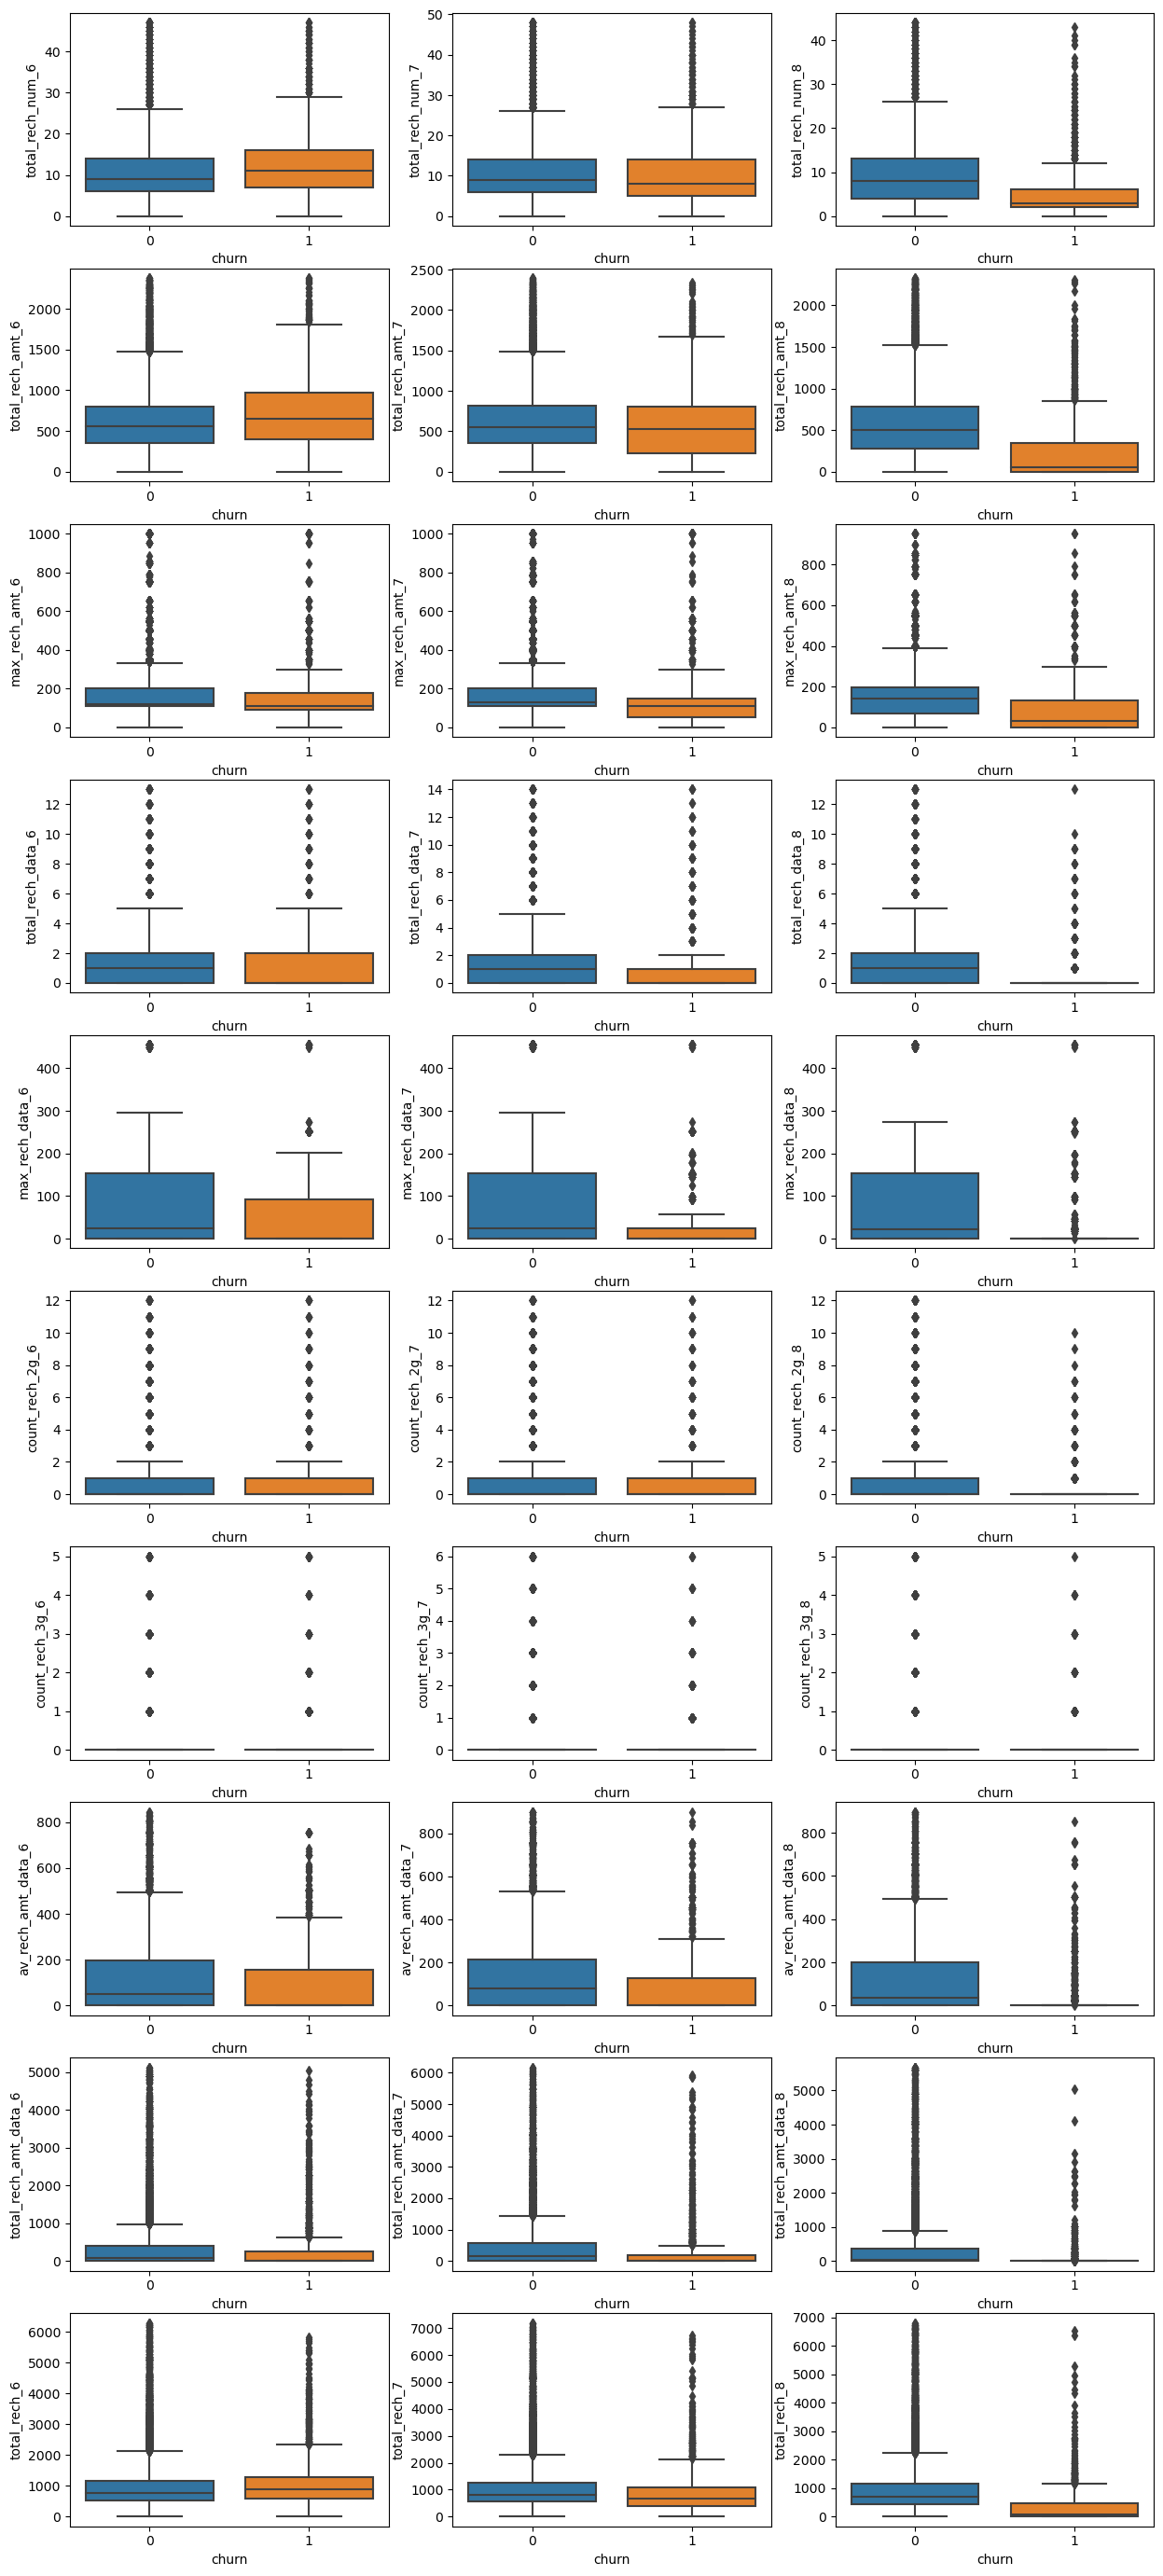

In [52]:
# Visualising recharge related columns

plt.figure(figsize=(15,35))

for i, k in enumerate(recharge_col):
    plt.subplot(10,3,i+1)
    sns.boxplot(x='churn',y=k, data=filter_train_data)
plt.show()

#### Observations: 


- There's a noticeable decline in the total number of recharges among churned customers from month to month, particularly evident in the 8th month.
- Likewise, the total recharge amount and maximum recharge amount exhibit a decrease in the 8th month for customers who are likely to churn.
- Overall, all columns display a declining trend for customers who are about to churn, indicating a pattern of decreasing activity or engagement.

In [53]:
list(filter_train_data.columns)

['id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'l

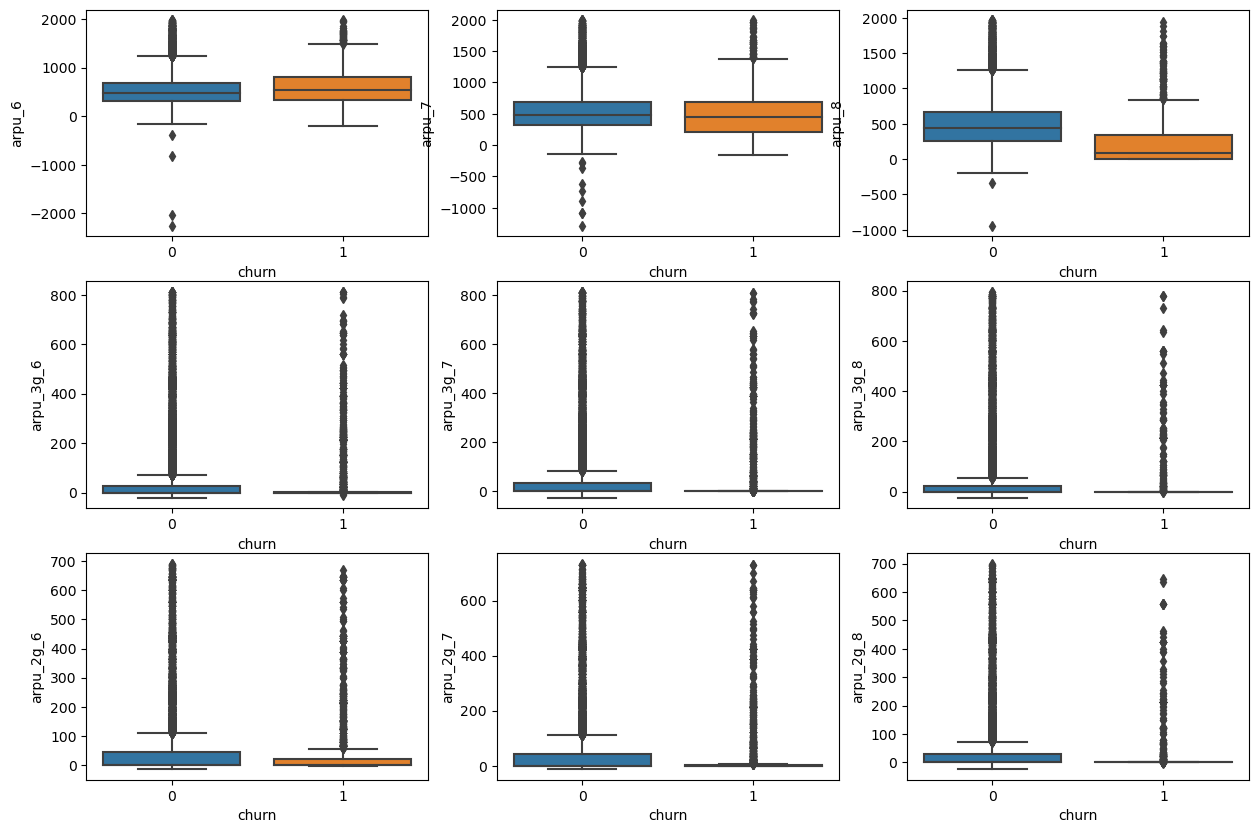

In [54]:
# Visualising average revenue related columns

plt.figure(figsize=(15,10))

for i, k in enumerate(arpu_col):
    plt.subplot(3,3,i+1)
    sns.boxplot(x='churn',y=k, data=filter_train_data)
plt.show()

#### Observations:

- The average revenue in the 6th and 7th months appears significantly higher compared to the revenue in the 8th month for customers who are likely to churn.
- This trend is also reflected in the average revenue derived from data usage (both 2G and 3G).
- Experiencing a decrease in revenue generation in the 8th month is more predisposed to churn, as indicated by the data.

In [55]:
# Extracting list of onnet and offnet columns 

net_col = filter_train_data.columns[filter_train_data.columns.str.contains('onnet_|offnet_')]
net_col

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8'],
      dtype='object')

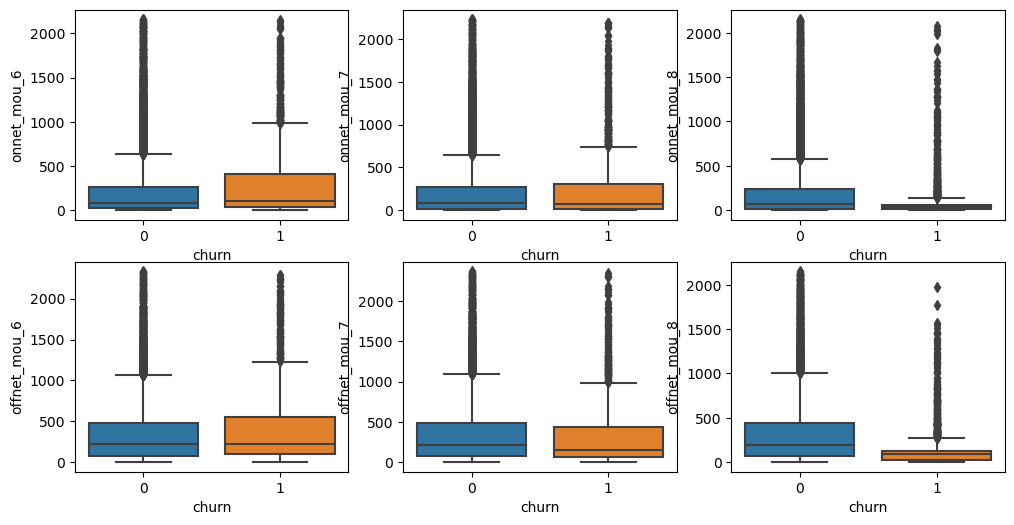

In [56]:
# Visualising onnet and offnet columns

plt.figure(figsize=(12,6))

for i, k in enumerate(net_col):
    plt.subplot(2,3,i+1)
    sns.boxplot(x='churn',y=k, data=filter_train_data)
plt.show()

#### Observations:

- Onnet and offnet call patterns also serve as indicators of potential churn, with customers exhibiting lower onnet and offnet call activity being more prone to churn.

In [57]:
# Extracting list of outgoing call columns 

og_col = filter_train_data.columns[filter_train_data.columns.str.contains('_og_')]
og_col                                   

Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')

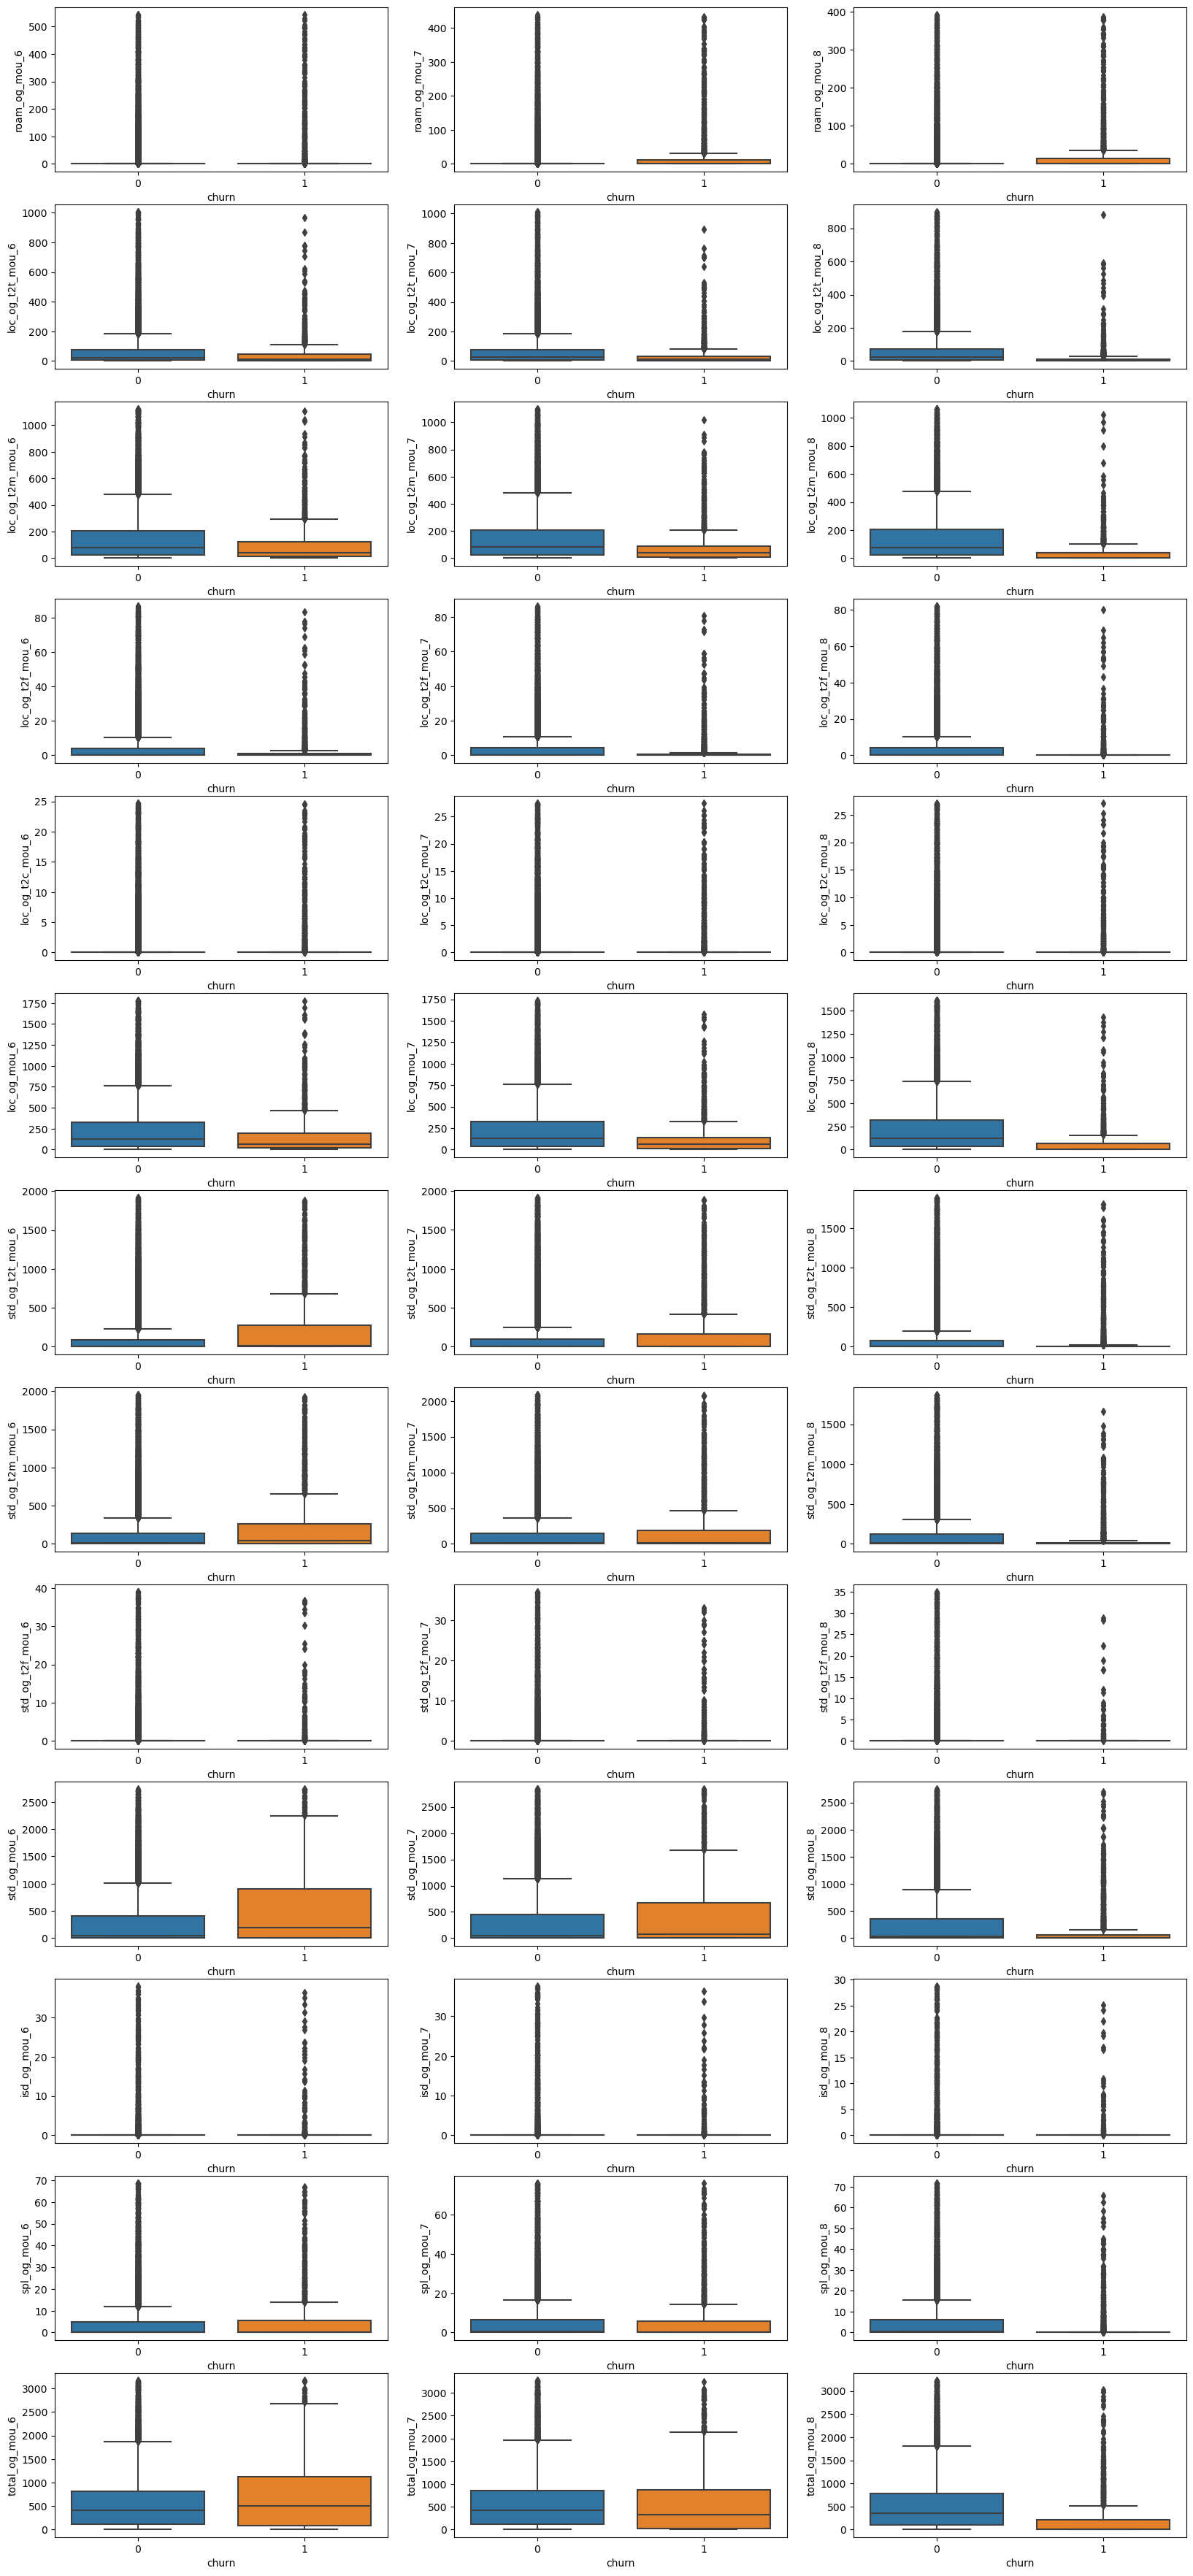

In [58]:
# Visualising all outgoing calls columns

plt.figure(figsize=(20,45))

for i, k in enumerate(og_col):
    plt.subplot(13,3,i+1)
    sns.boxplot(x='churn',y=k, data=filter_train_data)
plt.show()

##### Observations:

- Outgoing call minutes usage demonstrates a peak in the 6th and 7th months followed by a decline in the 8th month.
- This trend is consistent across different call types including STD, ISD, Special, and Local calls, indicating a general decrease in usage during the 8th month.

In [59]:
# Extracting list of incoming call columns 

ic_col = filter_train_data.columns[filter_train_data.columns.str.contains('_ic_')]
ic_col   

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8'],
      dtype='object')

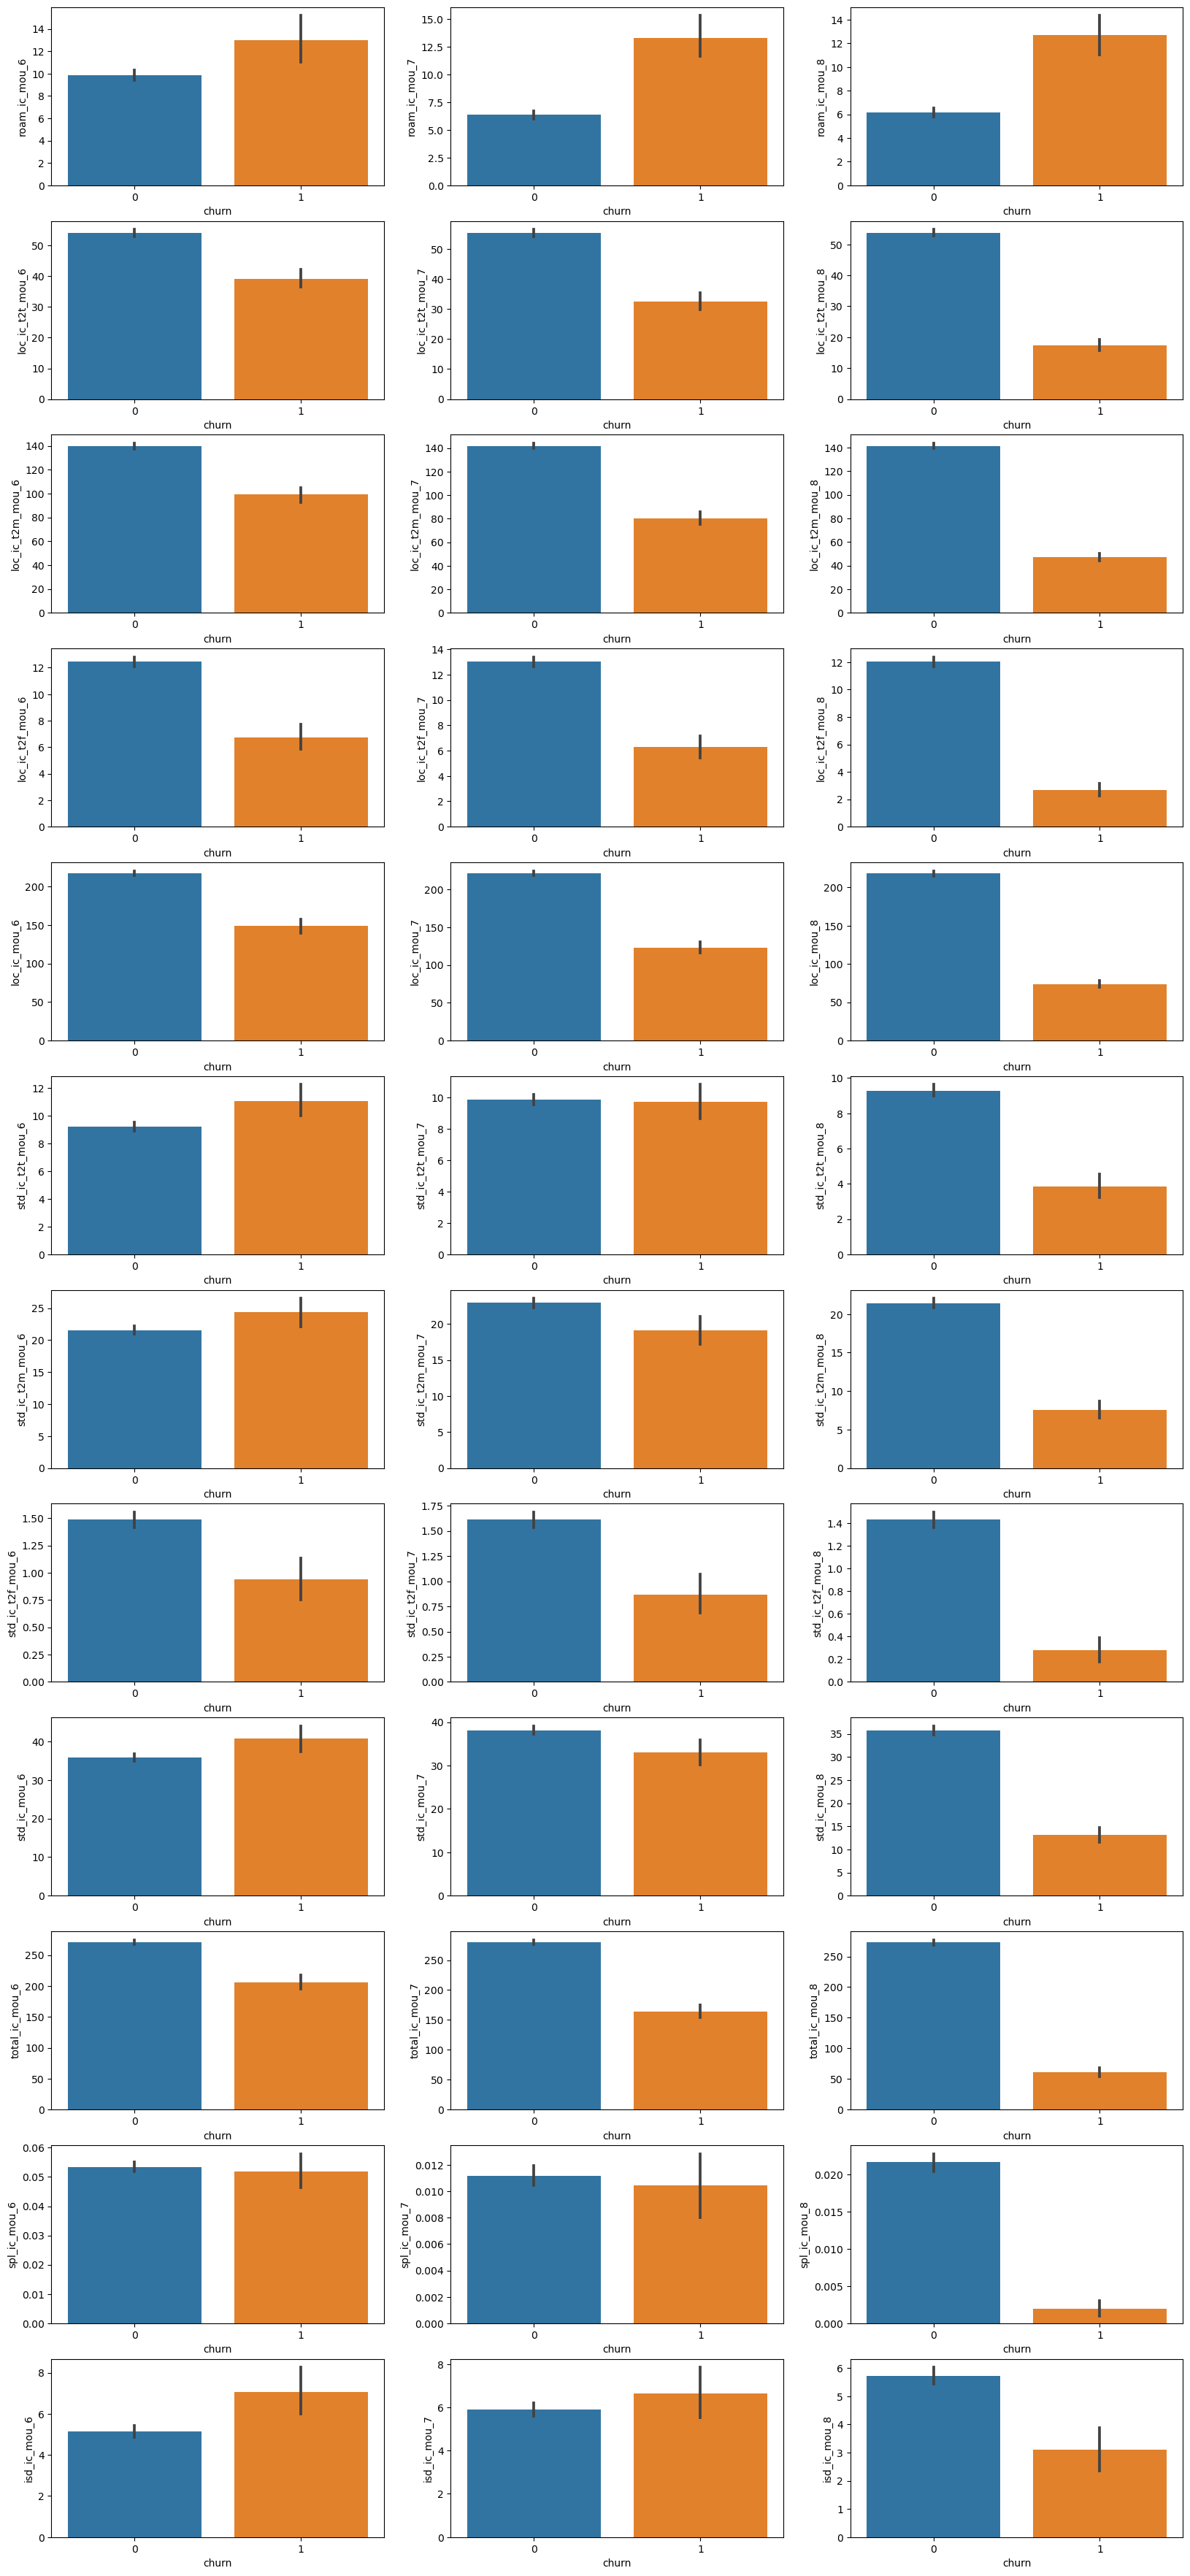

In [60]:
# Visualising incoming calls columns

plt.figure(figsize=(20,45))

for i, k in enumerate(ic_col):
    plt.subplot(12,3,i+1)
    sns.barplot(x='churn',y=k, data=filter_train_data)
plt.show()

#### Observations:

- Similarly, incoming calls exhibit a decrease in both the number of calls and minutes of usage during the 8th month.
- Interestingly, during roaming, churned customers receive more incoming calls compared to non-churned customers.

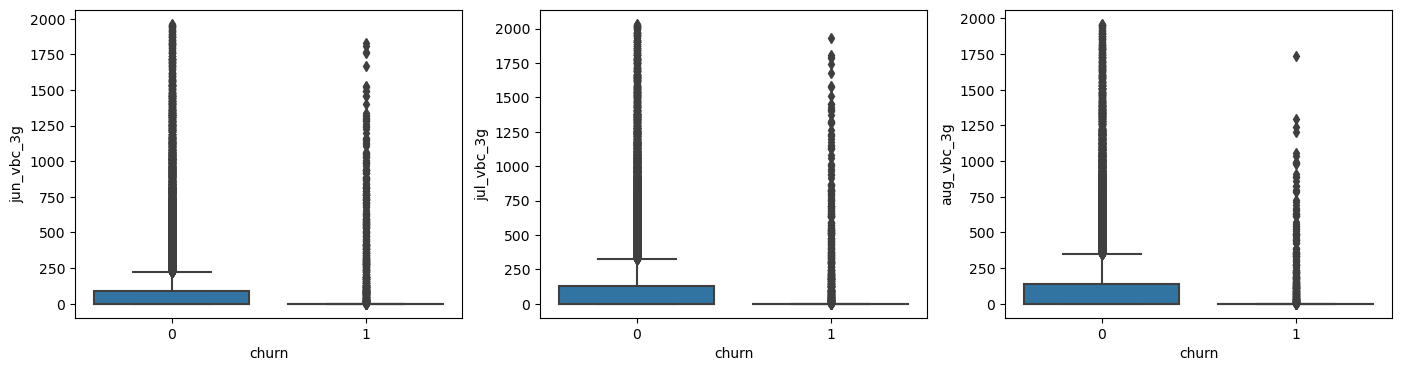

In [61]:
# Visualising volumne based cost

vbc_col = ['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g']

plt.figure(figsize=(17,4))

for i, k in enumerate(vbc_col):
    plt.subplot(1,3,i+1)
    sns.boxplot(x='churn',y=k, data=filter_train_data)
plt.show()

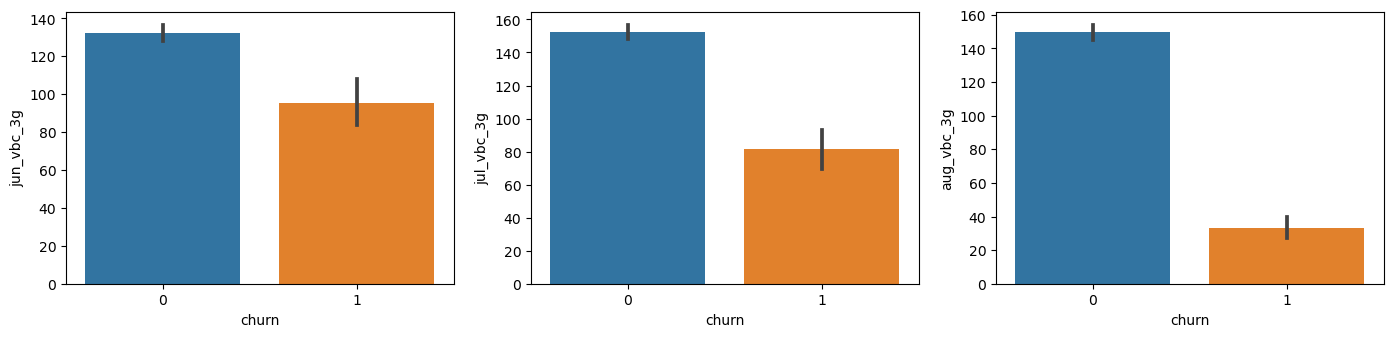

In [62]:
plt.figure(figsize=(17, 12))

for i, k in enumerate(vbc_col):
    plt.subplot(3,3,i+1)
    sns.barplot(x='churn',y=k, data=filter_train_data)
plt.show()

### Observations:

- It's evident that the volume-based cost is significantly lower for churned customers compared to non-churned customers.

In [63]:
# Extracting list of monthly and sachet  columns 

serv_col = filter_train_data.columns[filter_train_data.columns.str.contains('monthly_|sachet_')]
serv_col     

Index(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

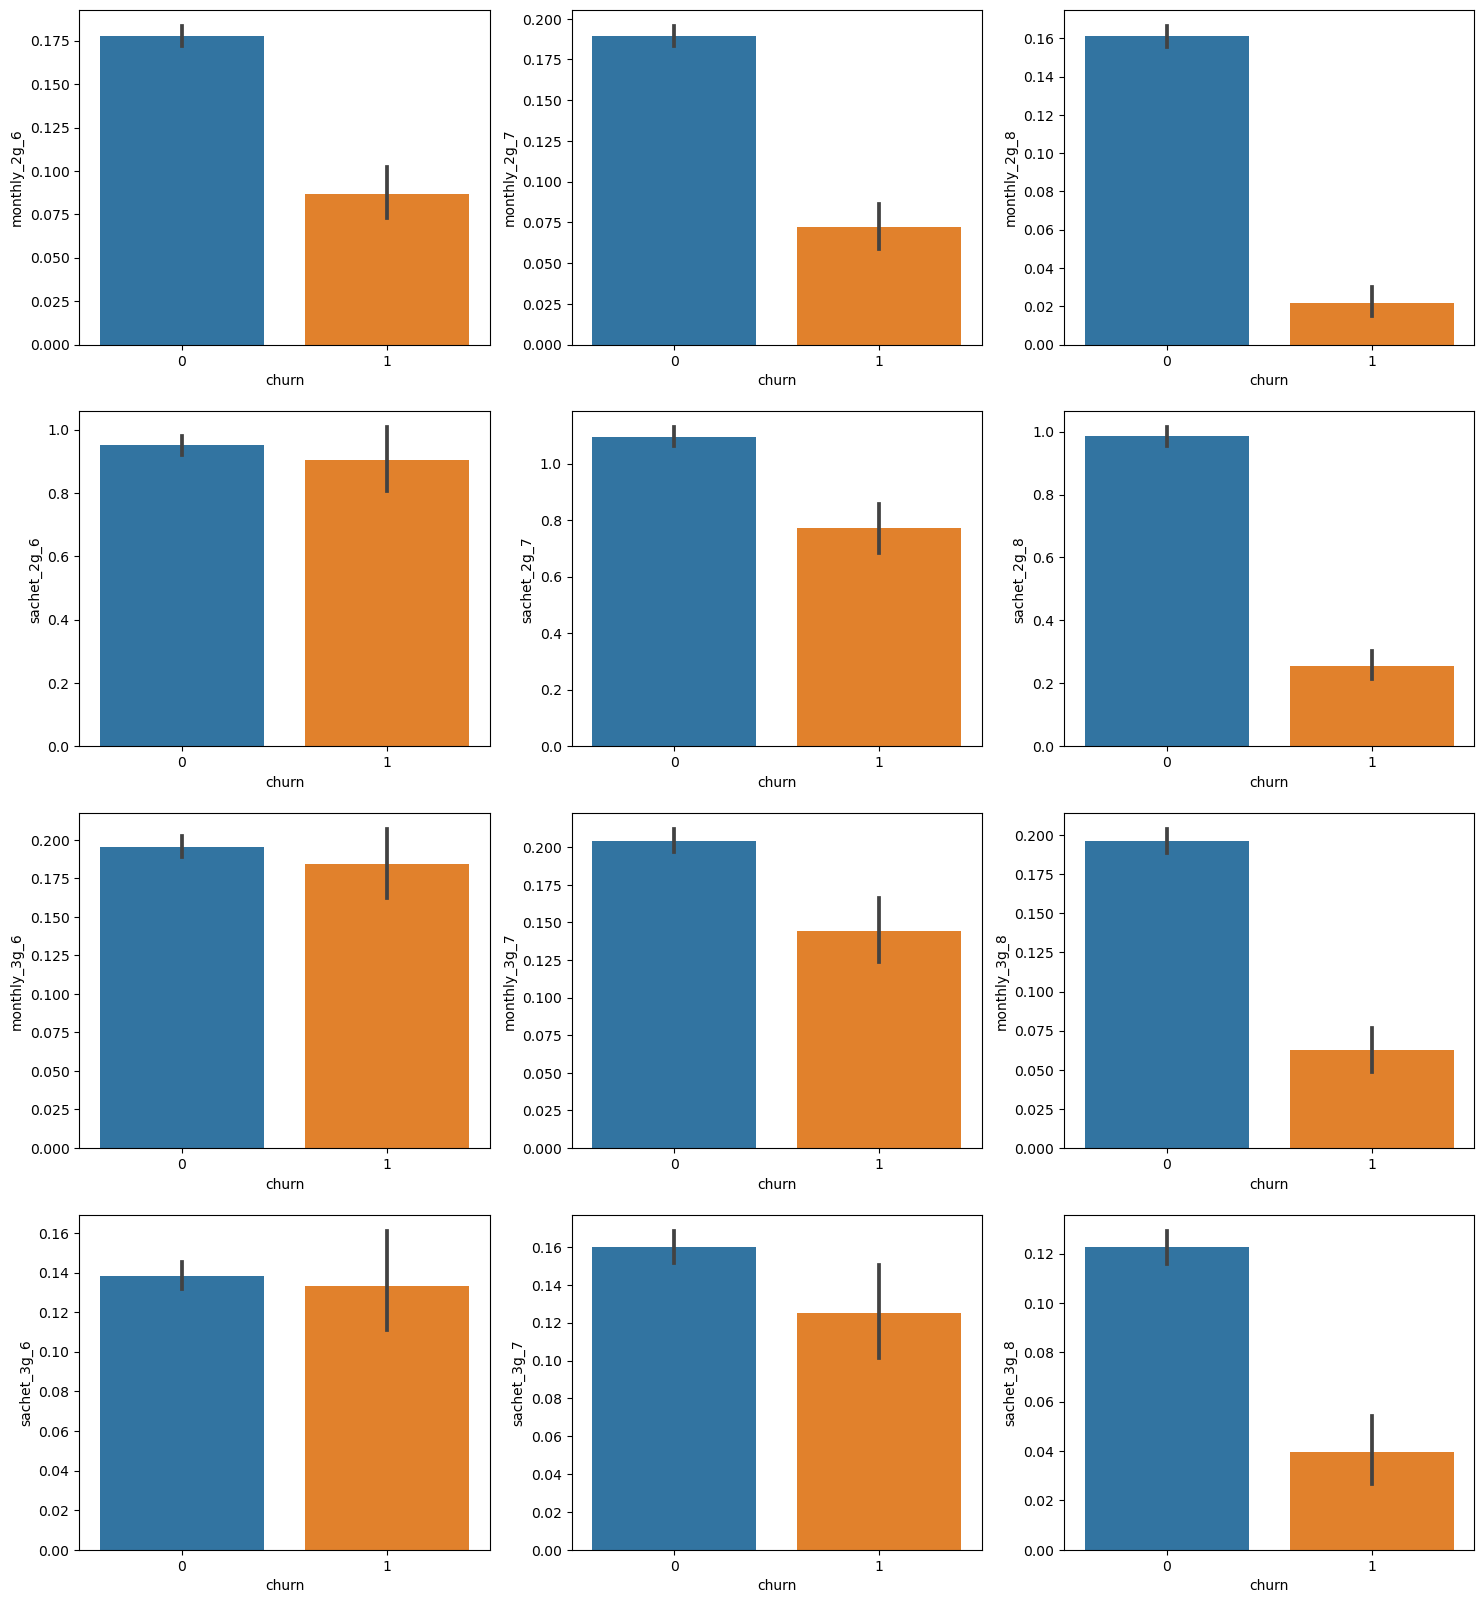

In [64]:
plt.figure(figsize=(18,20))

for i, k in enumerate(serv_col):
    plt.subplot(4,3,i+1)
    sns.barplot(x='churn',y=k, data=filter_train_data)
plt.show()

#### Observations:

- There's a noticeable decline in the number of customers opting for monthly and sachet schemes in the 8th month.

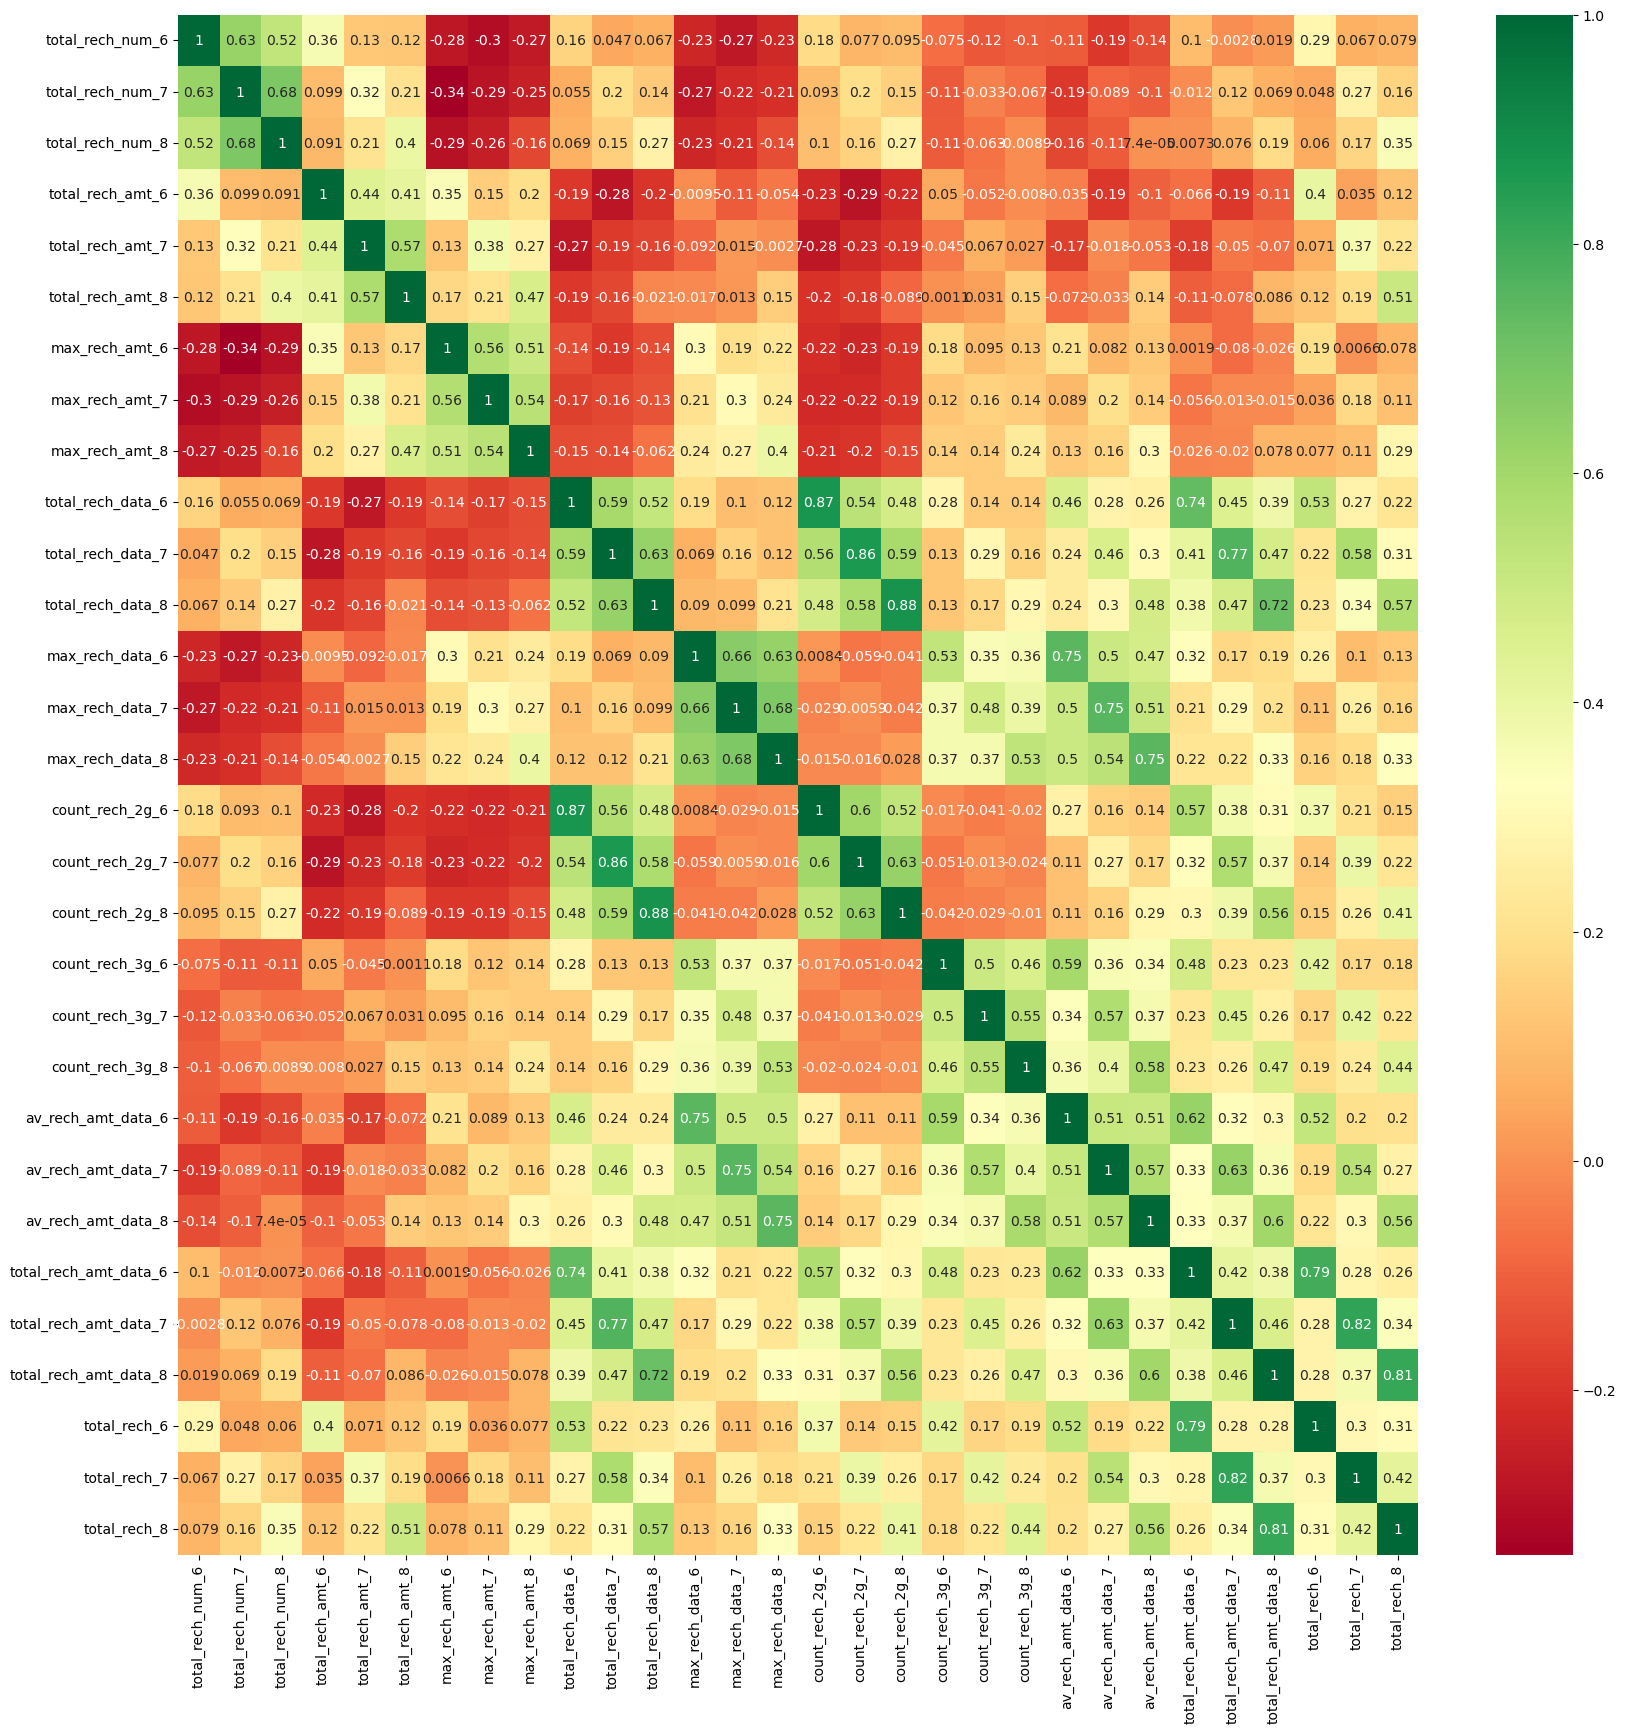

In [65]:
plt.figure(figsize=(20,20))

sns.heatmap(filter_train_data[recharge_col].corr(), annot=True, cmap='RdYlGn')
plt.show()

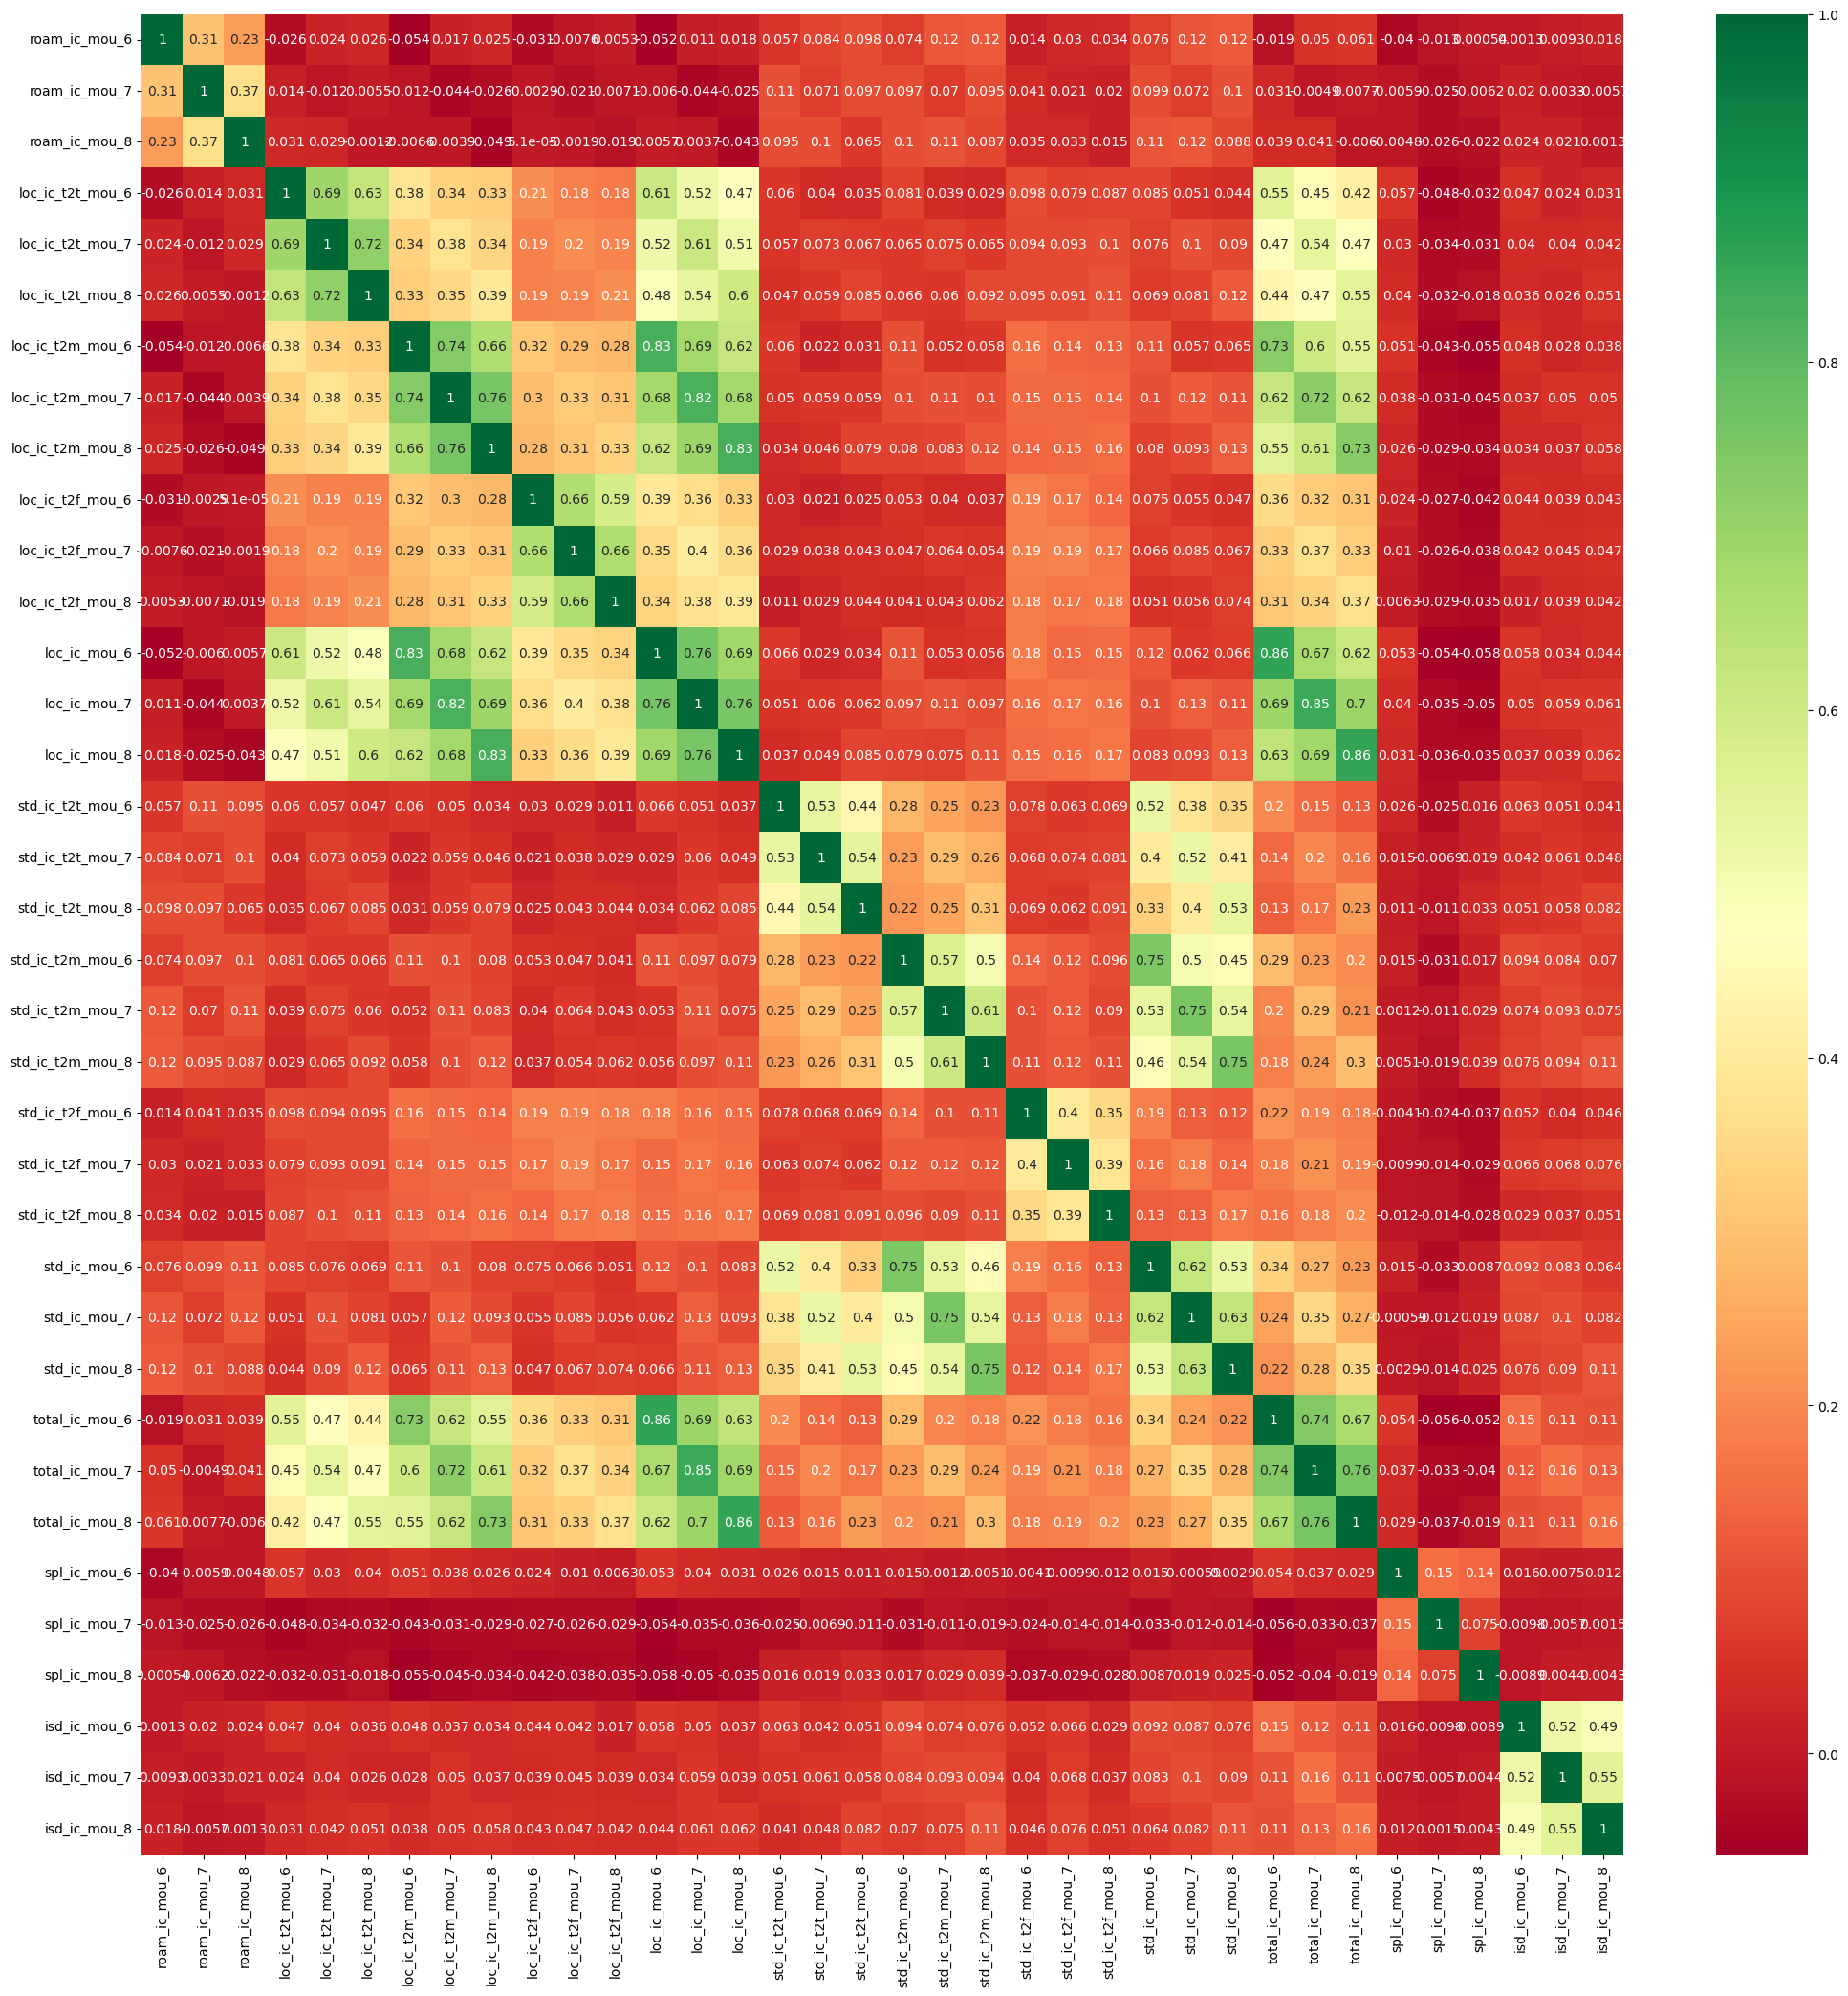

In [66]:
plt.figure(figsize=(25,25))

sns.heatmap(filter_train_data[ic_col].corr(), annot=True, cmap='RdYlGn')
plt.show()

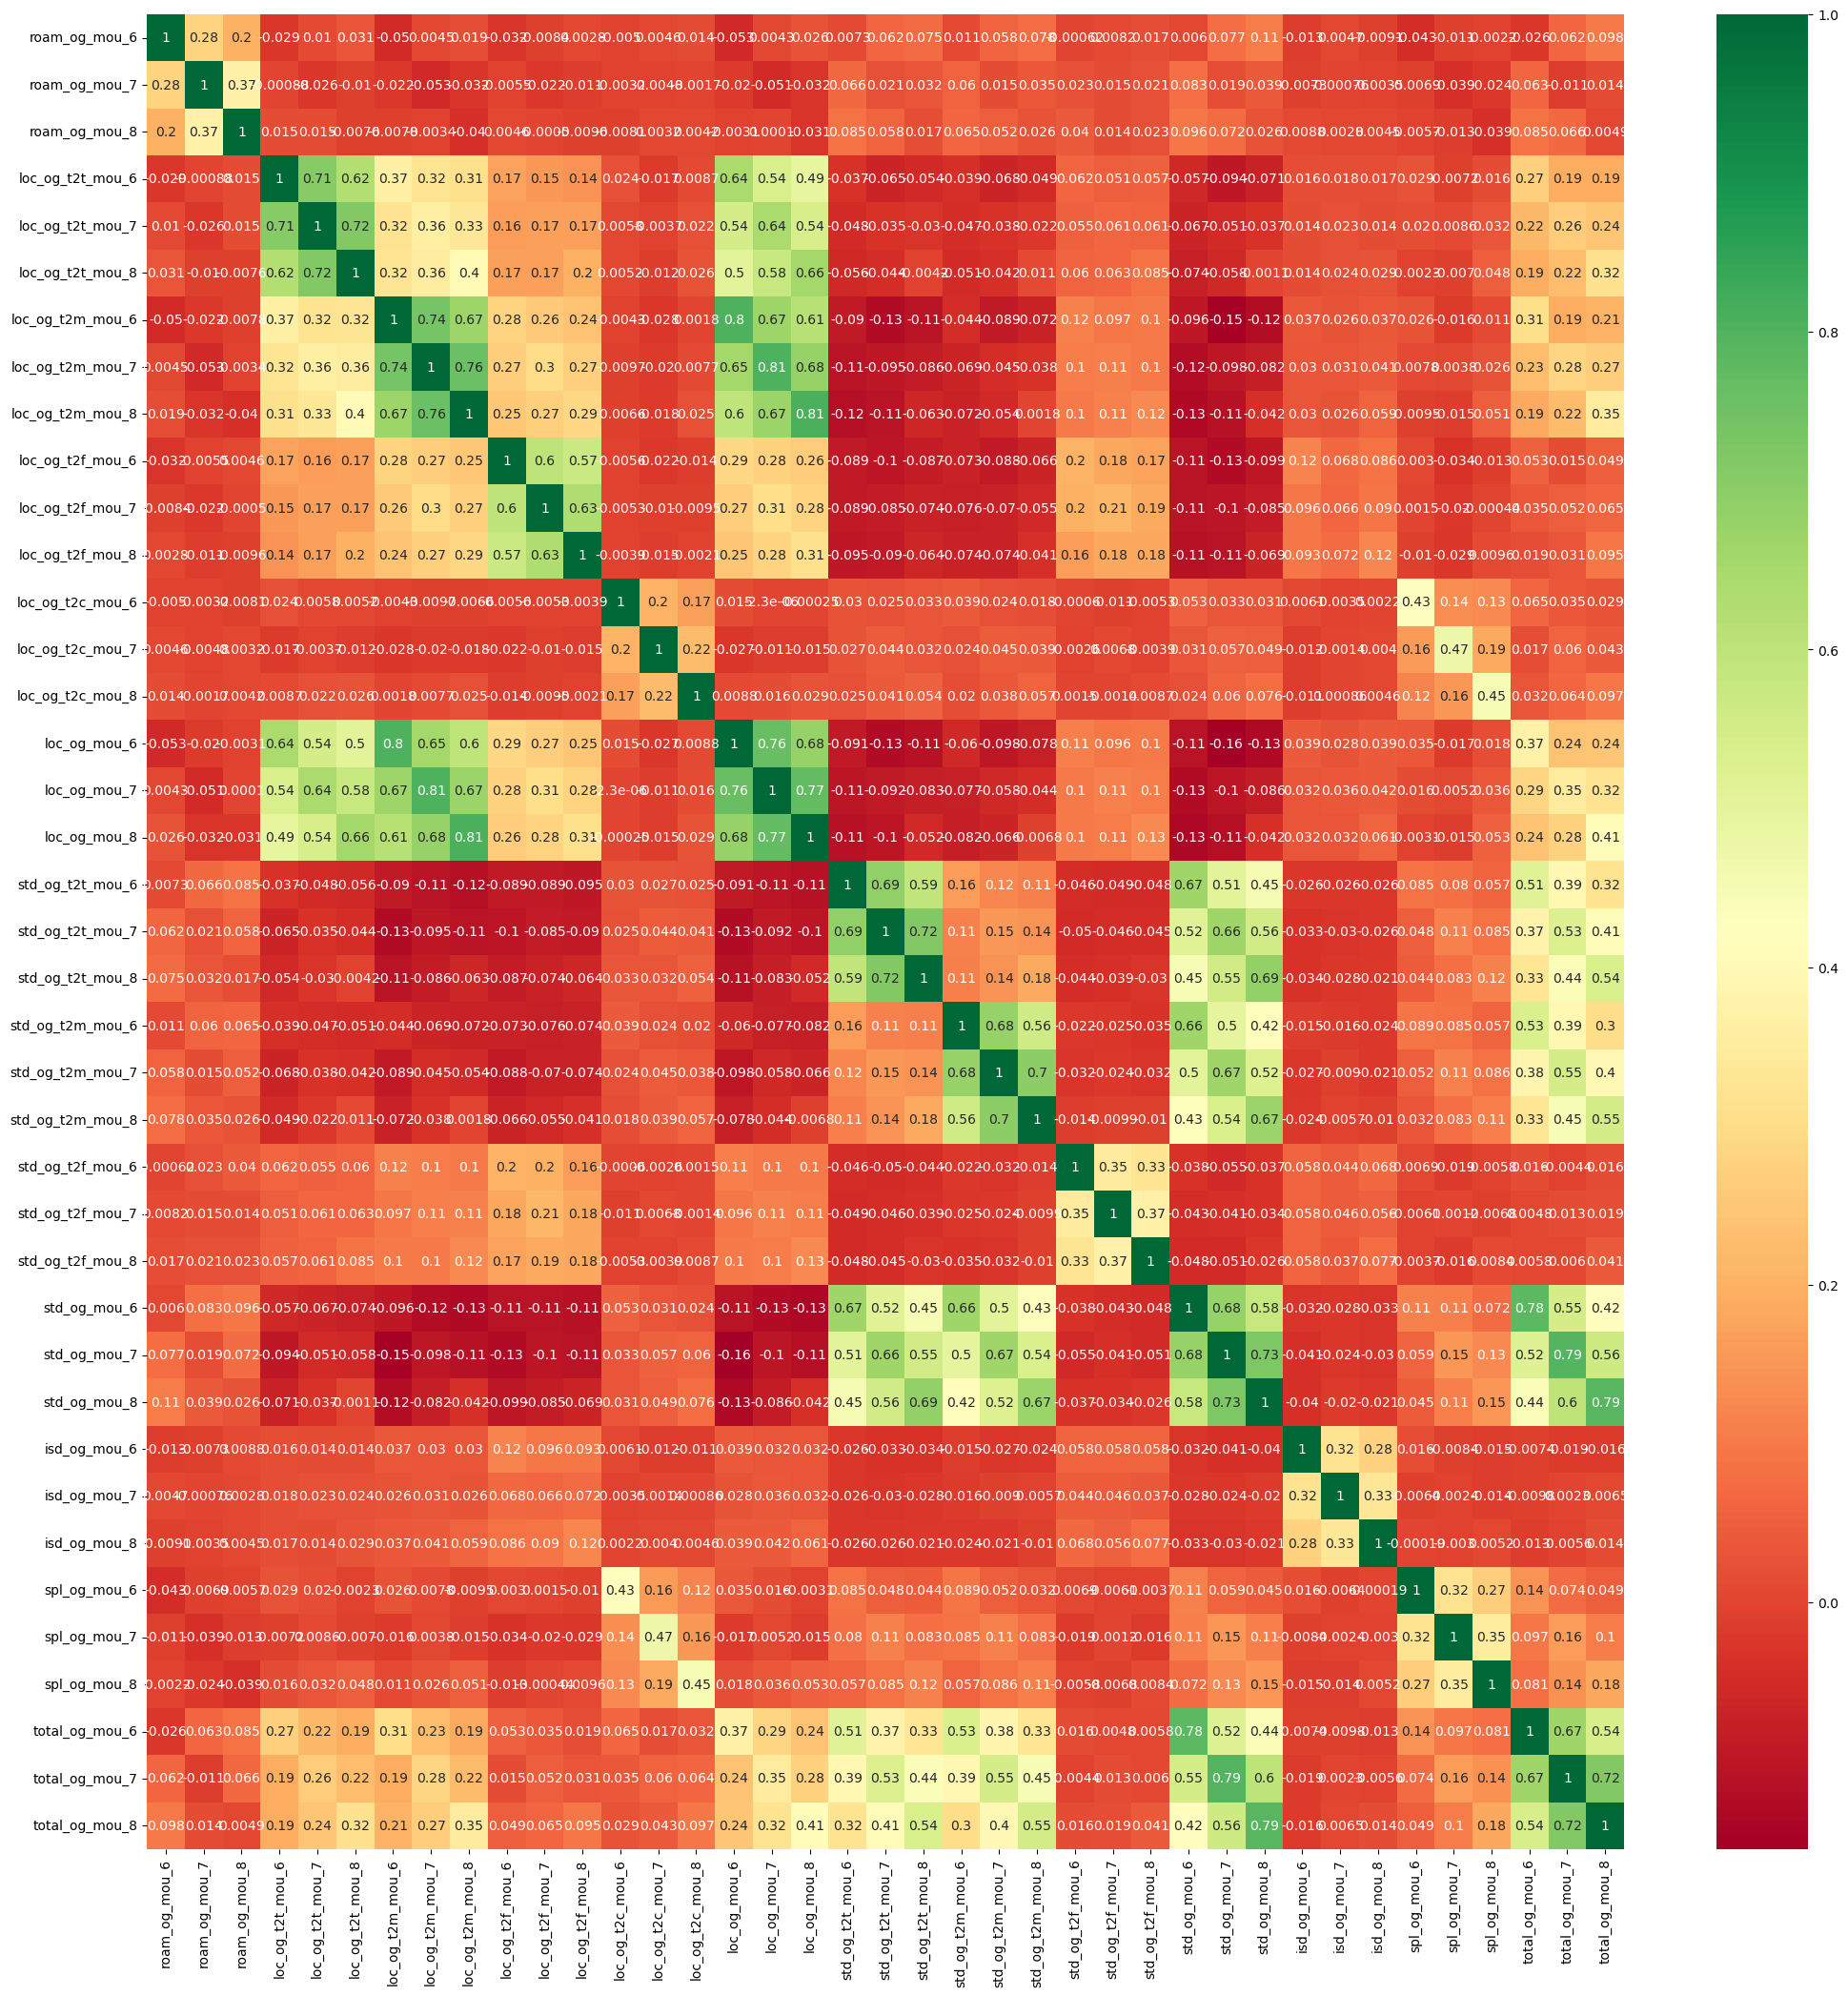

In [67]:
plt.figure(figsize=(25,25))

sns.heatmap(filter_train_data[og_col].corr(), annot=True, cmap='RdYlGn')
plt.show()

#### Observations:

- Numerous columns in the dataframe exhibit high correlations, either positively or negatively, with other columns. To address this, we plan to employ methods such as Variance Inflation Factor (VIF) and Principal Component Analysis (PCA).

In [68]:
# Deriving new column tenure based on aon column

filter_train_data['tenure'] = (filter_train_data['aon']/30).round(0)
filter_train_data.head()

id     arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
4   4.0000   240.7080 128.1910 101.5650      21.2800       4.8300   
15 15.0000   580.5490 377.2940 338.2860      10.4300      24.9900   
23 23.0000 1,130.9480 905.5060 479.7620     859.5300     372.7100   
24 24.0000   371.9740 352.0690 240.4490      93.1800      38.2900   
27 27.0000   390.4890 350.9850 421.3000       8.5800      11.4800   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
4        6.1300       56.9900       38.1100        9.6300        53.6400   
15     194.4300      317.1100      341.7900      197.0900         0.0000   
23       0.8900      293.4600      450.1100      386.9100         0.0000   
24      29.8600      531.1900      507.7600      222.0300         0.0000   
27      12.6800      133.1600      158.7300      182.8300         0.0000   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
4          0.0000         0.0000        15.7300         0.0000         0.0000   
15         0.0000         0.0000         0.0000         0.0000         0.0000   
23         0.0000         0.0000         0.0000         0.0000         0.0000   
24         0.0000         0.0000         0.0000         0.0000         0.0000   
27         0.0000         0.0000         0.0000         0.0000         0.0000   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
4            10.1600            4.8300            6.1300           36.7400   
15           10.4300           24.9900          194.4300          313.7600   
23          859.5300          372.7100            0.8900           79.7900   
24           93.1800           38.2900           29.8600          159.2900   
27            8.5800           11.4800           12.6800           96.9100   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
4            19.8800            4.6100           11.9900            1.2300   
15          330.8800          185.8800            3.2600           10.9100   
23          424.6300          378.0100           11.5800           25.4300   
24          219.4400           99.8600            0.0000            0.0000   
27          149.4400          157.2300           33.7100            9.2800   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
4             5.0100            0.0000            9.8500            0.0000   
15            4.9400            0.0000            0.0000            0.0000   
23            8.8800            0.0000            0.0000            0.0000   
24            0.0000            0.0000            0.0000            0.3600   
27           25.5900            0.0000            0.0000            0.0000   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
4        58.9100       25.9400       15.7600            0.0000   
15      327.4600      366.7900      385.2600            0.0000   
23      950.9100      822.7800      387.7900            0.0000   
24      252.4800      257.7400      129.7300            0.0000   
27      139.2100      170.2100      195.5100            0.0000   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
4             0.0000            0.0000            4.3500            0.0000   
15            0.0000            0.0000            0.0000            0.0000   
23            0.0000            0.0000          202.0800            0.0000   
24            0.0000            0.0000          371.8900          288.3100   
27            0.0000            0.0000            2.5300            0.0000   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
4             0.0000            0.0000            0.0000            0.0000   
15            0.0000            0.0000            0.0000            6.2600   
23            0.0000            0.0000            0.0000            0.0000   
24          121.7900            0.0000            0.0000        

In [69]:
# Filtering the columns that ends with either 6 or 7

col_list = filter_train_data.filter(regex='_6|_7').columns.str[:-2]
col_list

Index(['arpu', 'arpu', 'onnet_mou', 'onnet_mou', 'offnet_mou', 'offnet_mou',
       'roam_ic_mou', 'roam_ic_mou', 'roam_og_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2m_mou',
       'loc_og_t2f_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2t_mou',
       'std_og_t2m_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_t2f_mou',
       'std_og_mou', 'std_og_mou', 'isd_og_mou', 'isd_og_mou', 'spl_og_mou',
       'spl_og_mou', 'og_others', 'og_others', 'total_og_mou', 'total_og_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2m_mou',
       'loc_ic_t2f_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'loc_ic_mou',
       'std_ic_t2t_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2m_mou',
       'std_ic_t2f_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'std_ic_mou',
       'total_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'spl_ic_mou',
       'isd_ic_mou', 'isd

In [70]:
# Calcualting the avegare of months 6 and 7 of all the columns and creating a new columns 

for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_6 & 7"
    col_6 = col+"_6"
    col_7 = col+"_7"
    filter_train_data[avg_col_name] = (filter_train_data[col_6]  + filter_train_data[col_7])/ 2

In [71]:
# Dropping the columns that ends with 6 and 7 as they are not need for futher analysis

col_list_to_drop = filter_train_data.filter(regex='_6|_7')
filter_train_data.drop(col_list_to_drop,axis=1,inplace=True)

In [72]:
filter_train_data.head()

id   arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
4   4.0000 101.5650       6.1300        9.6300         0.0000         0.0000   
15 15.0000 338.2860     194.4300      197.0900         0.0000         0.0000   
23 23.0000 479.7620       0.8900      386.9100         0.0000         0.0000   
24 24.0000 240.4490      29.8600      222.0300         0.0000         0.0000   
27 27.0000 421.3000      12.6800      182.8300         0.0000         0.0000   

    loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
4             6.1300            4.6100            5.0100            0.0000   
15          194.4300          185.8800            4.9400            0.0000   
23            0.8900          378.0100            8.8800            0.0000   
24           29.8600           99.8600            0.0000            0.3600   
27           12.6800          157.2300           25.5900            0.0000   

    loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
4        15.7600            0.0000            0.0000            0.0000   
15      385.2600            0.0000            0.0000            6.2600   
23      387.7900            0.0000            0.0000            0.0000   
24      129.7300            0.0000          121.7900            0.0000   
27      195.5100            0.0000            0.0000            0.0000   

    std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
4         0.0000        0.0000        0.0000       0.0000         15.7600   
15        6.2600        0.0000        0.0000       0.0000        391.5300   
23        0.0000        0.0000        0.0100       0.0000        387.8100   
24      121.7900        0.0000        0.3600       0.0000        251.8900   
27        0.0000        0.0000        0.0000       0.0000        195.5100   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
4             2.6600           19.4900            6.1400       28.3100   
15          335.4300          285.6300            8.8800      629.9400   
23           30.3900          148.8300           23.6600      202.8900   
24           19.1400          150.7300            1.1300      171.0100   
27           82.8100          159.6900          107.9400      350.4600   

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
4             0.0000            0.0000            0.0000        0.0000   
15            0.0000            0.0000            0.0000        0.0000   
23            0.0000            0.0000            0.0000        0.0000   
24            0.0000           21.9300            0.0000       21.9300   
27            0.4000            0.0000            0.0000        0.4000   

    total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
4          28.3100        0.0000        0.0000       0.0000            8.0000   
15        629.9400        0.0000        0.0000       0.0000            4.0000   
23        203.2900        0.0000        0.0000       0.4000           10.0000   
24        192.9400        0.0000        0.0000       0.0000           10.0000   
27        350.8600        0.0000        0.0000       0.0000            4.0000   

    total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
4           122.0000         30.0000             30.0000             6.0000   
15          652.0000        250.0000            250.0000             1.0000   
23          494.0000        144.0000             30.0000             0.0000   
24          240.0000         30.0000             30.0000             1.0000   
27          250.0000        164.0000             61.0000             3.0000   

    max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  \
4           25.0000           6.0000           0.0000            142.0000   
15         154.0000           1.0000           0.0000            154.0000   
23           0.0000           0.0000           0.0000              

### Step 3: Data Preparation

##### Train Test Split

In [73]:
# splitting the entire data into 70% train data and 30% test data

df_train, df_test = train_test_split(filter_train_data, train_size=0.7, test_size=0.3, random_state=100)

# Random state is specified as we need to get the same trian and test sets

print('shape of train data is', df_train.shape)
print('shape of test data is', df_test.shape)

shape of train data is (14709, 56)
shape of test data is (6304, 56)


####  Rescaling using Normalisation technique

In [74]:
# Storing id in the new df, as it is not need for model building

id = df_train.pop('id')
id.head()

6968     6,968.0000
42203   42,203.0000
18406   18,406.0000
21455   21,455.0000
66143   66,143.0000
Name: id, dtype: float64

In [75]:
df_train.shape

(14709, 55)

In [76]:
final_col = list(df_train.columns)
final_col

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'churn',
 'total_rech_amt_data_8',
 'total_rech_8',
 'tenure']

In [77]:
# 1.  Instiatite the object

scaler = MinMaxScaler()

# 2.  Fit on the data
df_train[final_col] = scaler.fit_transform(df_train[final_col])
df_train.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
6968   0.5686       0.0149        0.0427         0.0000         0.0000   
42203  0.5811       0.3697        0.3193         0.0142         0.0677   
18406  0.6094       0.0415        0.8861         0.0000         0.0000   
21455  0.5405       0.0329        0.2474         0.0000         0.0000   
66143  0.5200       0.0082        0.1305         0.0000         0.0000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
6968             0.0131            0.0379            0.0000            0.0000   
42203            0.0511            0.1039            0.0110            0.2120   
18406            0.0185            0.0302            0.0330            0.0000   
21455            0.0679            0.1519            0.0079            0.2430   
66143            0.0005            0.0467            0.0000            0.0000   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
6968         0.0393            0.0000            0.0018            0.0000   
42203        0.0975            0.3949            0.2955            0.0000   
18406        0.0319            0.0385            1.0000            0.0000   
21455        0.1383            0.0052            0.1978            0.0000   
66143        0.0310            0.0091            0.1232            0.0000   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
6968         0.0038        0.0000        0.0000       0.0000          0.0000   
42203        0.4749        0.0000        0.1945       0.0000          0.4548   
18406        0.7110        0.0000        0.0000       0.0000          0.6175   
21455        0.1389        0.0000        0.0917       0.0000          0.1886   
66143        0.0906        0.0219        0.0190       0.0000          0.0928   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
6968             0.0261            0.0609            0.0052        0.0659   
42203            0.1299            0.1368            0.0045        0.1484   
18406            0.0775            0.0713            0.0225        0.0842   
21455            0.0769            0.1771            0.3406        0.1949   
66143            0.0007            0.0495            0.0021        0.0338   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
6968             0.0000            0.0057            0.0000        0.0111   
42203            0.1799            0.0702            0.0331        0.1225   
18406            0.2526            0.1013            0.0000        0.1699   
21455            0.0203            0.0100            0.0000        0.0150   
66143            0.1199            0.0588            0.0000        0.0879   

       total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
6968           0.0000        0.0000        0.0000       0.0000   
42203          0.1643        0.0000        0.0000       0.0000   
18406          0.1873        0.0000        0.4644       0.0141   
21455          0.1714        0.0000        0.0082       0.0000   
66143          0.0613        0.4643        0.0366       0.0000   

       total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
6968             0.0682            0.0000          0.0000              0.0000   
42203            0.3636            0.3308          0.1577              0.0000   
18406            0.4091            0.4394          0.0831              0.1398   
21455            0.1818            0.3368          0.1598              0.2301   
66143            0.5227            0.2831          0.1619              0.0177   

       total_rech_data_8  max_rech_data_8  count_rech_2g_8  count_rech_3g_8  \
6968              0.0000           0.0000           0.0000           0.0000   
42203             0.2308           0.0505           0.2500           0.0000   
18406             0.0000           0.0000           0.0000           0.0000   
21455

In [78]:
# Dividing into X and Y sets for the model building

y_train = df_train.pop('churn')
X_train = df_train

### Checking the Churn Rate

In [79]:
# Checking the churn imbalance in the dataset

churn = (sum(filter_train_data['churn'])/len(filter_train_data['churn'].index))*100
churn

8.275829248560415

#### Observation:

- Clearly there is class imbalance

In [80]:
# addressing class imbalance issues using SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)
X_train,y_train = smote.fit_resample(X_train,y_train)

## Model-1: Logistic Regression

In [81]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26966
Model Family:                Binomial   Df Model:                           53
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10413.
Date:                Wed, 06 Mar 2024   Deviance:                       20826.
Time:                        18:18:56   Pearson chi2:                 3.18e+07
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4597
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.1245      0.180      6.234      0.000       0.771       1.478
arpu_8                    2.7836      0.530      5.249      0.000       1.744       3.823
onnet_mou_8               1.0300      0.345      2.985      0.003       0.354       1.706
offnet_mou_8              1.5983      0.365      4.380      0.000       0.883       2.314
roam_ic_mou_8             1.5177      0.218      6.970      0.000       1.091       1.944
roam_og_mou_8             1.8312      0.197      9.277      0.000       1.444       2.218
loc_og_t2t_mou_8         -1.6113      0.416     -3.873      0.000      -2.427      -0.796
loc_og_t2m_mou_8         -2.2931      0.374     -6.138      0.000      -3.025      -1.561
loc_og_t2f_mou_8         -0.4023      0.258     -1.558      0.119      -0.908       0.104
loc_og_t2c_mou_8         -0.4655      0.197     -2.363      0.018      -0.852      -0.079
loc_og_mou_8              1.3071      0.507      2.578      0.010       0.313       2.301
std_og_t2t_mou_8         -1.6123      0.318     -5.074      0.000      -2.235      -0.990
std_og_t2m_mou_8         -2.3252      0.332     -7.000      0.000      -2.976      -1.674
std_og_t2f_mou_8         -3.1947      0.501     -6.372      0.000      -4.177      -2.212
std_og_mou_8              4.4335      0.561      7.897      0.000       3.333       5.534
isd_og_mou_8              0.9428      0.429      2.200      0.028       0.103       1.783
spl_og_mou_8              0.1801      0.177      1.017      0.309      -0.167       0.527
og_others_8            4.179e-15   1.35e-14      0.310      0.757   -2.22e-14    3.06e-14
total_og_mou_8           -5.4302      0.651     -8.343      0.000      -6.706      -4.155
loc_ic_t2t_mou_8         -1.9910      0.462     -4.308      0.000      -2.897      -1.085
loc_ic_t2m_mou_8         -1.4154      0.549     -2.578      0.010      -2.492      -0.339
loc_ic_t2f_mou_8         -1.5081      0.299     -5.049      0.000      -2.093      -0.923
loc_ic_mou_8              8.4662      0.904      9.363      0.000       6.694      10.238
std_ic_t2t_mou_8          0.8375      0.370      2.264      0.024       0.112       1.563
std_ic_t2m_mou_8          0.1638      0.562      0.291      0.771      -0.938       1.266
std_ic_t2f_mou_8         -1.7751      0.344     -5.164      0.000      -2.449      -1.101
std_ic_mou_8              0.3529      0.737      0.479      0.632      -1.091       1.797
total_ic_mou_8          -13.1481      0.781    -16.833      0.000     -14.679     -11.617
spl_ic_mou_8             -3.8849      0.281    -13.841      0.000      -4.435      -3.335
isd_ic_mou_8              1.0856      0.311      3.490      0.000       0.476       1.695
ic_others_8              -1.4801      0.349     -4.246      0.000      -2.163      -0.797
total_rech_num_8       

- It has been noted that certain features are statistically insignificant.
- Therefore, it is required to proceed with feature elimination to streamline the dataset and enhance model efficiency.

### Feature Selection Using RFE

In [82]:
# Getting the top 20 features using RFE method

logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train,y_train)

In [83]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_8', False, 2),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 3),
 ('loc_og_t2c_mou_8', False, 3),
 ('loc_og_mou_8', False, 3),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_8', True, 1),
 ('std_og_mou_8', True, 1),
 ('isd_og_mou_8', False, 2),
 ('spl_og_mou_8', False, 3),
 ('og_others_8', False, 3),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', False, 2),
 ('loc_ic_t2m_mou_8', False, 3),
 ('loc_ic_t2f_mou_8', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 3),
 ('std_ic_t2m_mou_8', False, 3),
 ('std_ic_t2f_mou_8', True, 1),
 ('std_ic_mou_8', False, 3),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 3),
 ('ic_others_8', True, 1),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_8', False, 3),
 ('

In [84]:
# top features are 

top_fea = X_train.columns[rfe.support_]
top_fea

Index(['arpu_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2f_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'last_day_rch_amt_8',
       'count_rech_2g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'arpu_3g_8', 'aug_vbc_3g', 'total_rech_amt_data_8'],
      dtype='object')

### Model 1.1 - Logistic Regression

In [85]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[top_fea]

In [86]:
# building the new model after RFE

X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26992
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10572.
Date:                Wed, 06 Mar 2024   Deviance:                       21145.
Time:                        18:18:59   Pearson chi2:                 1.37e+07
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4532
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.2478      0.175      7.133      0.000       0.905       1.591
arpu_8                    2.1372      0.518      4.126      0.000       1.122       3.153
offnet_mou_8              1.8145      0.358      5.066      0.000       1.113       2.516
roam_ic_mou_8             1.4923      0.213      7.018      0.000       1.076       1.909
roam_og_mou_8             1.8589      0.195      9.522      0.000       1.476       2.241
loc_og_t2t_mou_8         -1.2679      0.368     -3.449      0.001      -1.988      -0.547
loc_og_t2m_mou_8         -1.9522      0.309     -6.326      0.000      -2.557      -1.347
std_og_t2t_mou_8         -0.6614      0.181     -3.663      0.000      -1.015      -0.307
std_og_t2m_mou_8         -2.5007      0.331     -7.555      0.000      -3.149      -1.852
std_og_t2f_mou_8         -3.2461      0.492     -6.591      0.000      -4.211      -2.281
std_og_mou_8              3.9203      0.476      8.236      0.000       2.987       4.853
total_og_mou_8           -4.6472      0.548     -8.474      0.000      -5.722      -3.572
loc_ic_t2f_mou_8         -1.5919      0.293     -5.432      0.000      -2.166      -1.017
loc_ic_mou_8              4.8958      0.524      9.338      0.000       3.868       5.923
std_ic_t2f_mou_8         -1.8294      0.346     -5.292      0.000      -2.507      -1.152
total_ic_mou_8          -11.7590      0.542    -21.713      0.000     -12.821     -10.698
spl_ic_mou_8             -3.7709      0.277    -13.615      0.000      -4.314      -3.228
ic_others_8              -1.4773      0.344     -4.290      0.000      -2.152      -0.802
total_rech_num_8         -1.8738      0.156    -12.004      0.000      -2.180      -1.568
total_rech_amt_8         -2.0157      0.338     -5.971      0.000      -2.677      -1.354
last_day_rch_amt_8       -2.1935      0.143    -15.301      0.000      -2.474      -1.913
count_rech_2g_8          -2.1005      0.222     -9.470      0.000      -2.535      -1.666
av_rech_amt_data_8       -2.7549      0.302     -9.122      0.000      -3.347      -2.163
vol_2g_mb_8              -3.4196      0.253    -13.517      0.000      -3.915      -2.924
vol_3g_mb_8              -2.3874      0.285     -8.367      0.000      -2.947      -1.828
arpu_3g_8                 2.5282      0.283      8.921      0.000       1.973       3.084
aug_vbc_3g               -3.2533      0.252    -12.920      0.000      -3.747      -2.760
total_rech_amt_data_8    -1.4731      0.383     -3.848      0.000      -2.223      -0.723
=========================================================================================
"""

In [87]:
# Let's check VIF values for Multicolinearity

vif = pd.DataFrame()
X_train_1 = X_train_sm.drop('const', axis=1)
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
10         total_og_mou_8 13.3200
9            std_og_mou_8 11.4900
1            offnet_mou_8 10.6600
12           loc_ic_mou_8  7.6000
18       total_rech_amt_8  7.2700
14         total_ic_mou_8  6.9300
7        std_og_t2m_mou_8  6.1100
0                  arpu_8  5.9400
21     av_rech_amt_data_8  5.6200
17       total_rech_num_8  4.0200
5        loc_og_t2m_mou_8  4.0000
24              arpu_3g_8  3.5500
6        std_og_t2t_mou_8  3.2200
23            vol_3g_mb_8  3.0300
26  total_rech_amt_data_8  2.6200
20        count_rech_2g_8  2.3300
19     last_day_rch_amt_8  2.1600
4        loc_og_t2t_mou_8  1.9900
25             aug_vbc_3g  1.8100
3           roam_og_mou_8  1.6700
2           roam_ic_mou_8  1.6700
11       loc_ic_t2f_mou_8  1.5000
22            vol_2g_mb_8  1.4200
13       std_ic_t2f_mou_8  1.1900
8        std_og_t2f_mou_8  1.1300
16            ic_others_8  1.1000
15           spl_ic_mou_8  1.0800

### Model 1.2 - Logistic Regression

In [88]:
# Removing the column having high VIF

X_train_rfe = X_train_rfe.drop('total_og_mou_8', axis=1)

In [89]:
# Rebuilding the model

X_train_sm = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26993
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10622.
Date:                Wed, 06 Mar 2024   Deviance:                       21245.
Time:                        18:19:03   Pearson chi2:                 2.13e+07
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4512
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.4662      0.172      8.524      0.000       1.129       1.803
arpu_8                    1.5645      0.509      3.071      0.002       0.566       2.563
offnet_mou_8              0.9460      0.312      3.036      0.002       0.335       1.557
roam_ic_mou_8             1.7396      0.210      8.289      0.000       1.328       2.151
roam_og_mou_8             1.8764      0.193      9.717      0.000       1.498       2.255
loc_og_t2t_mou_8         -2.4939      0.338     -7.374      0.000      -3.157      -1.831
loc_og_t2m_mou_8         -2.8270      0.278    -10.171      0.000      -3.372      -2.282
std_og_t2t_mou_8         -0.7836      0.179     -4.367      0.000      -1.135      -0.432
std_og_t2m_mou_8         -1.8354      0.300     -6.119      0.000      -2.423      -1.248
std_og_t2f_mou_8         -3.2204      0.494     -6.524      0.000      -4.188      -2.253
std_og_mou_8              0.4289      0.217      1.979      0.048       0.004       0.854
loc_ic_t2f_mou_8         -1.6582      0.294     -5.646      0.000      -2.234      -1.083
loc_ic_mou_8              5.2889      0.523     10.106      0.000       4.263       6.315
std_ic_t2f_mou_8         -1.7529      0.346     -5.071      0.000      -2.430      -1.075
total_ic_mou_8          -12.3561      0.541    -22.845      0.000     -13.416     -11.296
spl_ic_mou_8             -3.7762      0.277    -13.650      0.000      -4.318      -3.234
ic_others_8              -1.4678      0.345     -4.259      0.000      -2.143      -0.792
total_rech_num_8         -1.9826      0.155    -12.786      0.000      -2.287      -1.679
total_rech_amt_8         -2.0114      0.335     -6.000      0.000      -2.668      -1.354
last_day_rch_amt_8       -2.1903      0.143    -15.334      0.000      -2.470      -1.910
count_rech_2g_8          -2.1522      0.222     -9.711      0.000      -2.587      -1.718
av_rech_amt_data_8       -2.6841      0.302     -8.894      0.000      -3.276      -2.093
vol_2g_mb_8              -3.4010      0.252    -13.470      0.000      -3.896      -2.906
vol_3g_mb_8              -2.4097      0.286     -8.426      0.000      -2.970      -1.849
arpu_3g_8                 2.6017      0.283      9.203      0.000       2.048       3.156
aug_vbc_3g               -3.2454      0.252    -12.894      0.000      -3.739      -2.752
total_rech_amt_data_8    -1.3289      0.380     -3.497      0.000      -2.074      -0.584
=========================================================================================
"""

In [90]:
# Let's check VIF values for Multicolinearity

vif = pd.DataFrame()
X_train_1 = X_train_sm.drop('const', axis=1)
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1            offnet_mou_8 9.7000
11           loc_ic_mou_8 7.6000
17       total_rech_amt_8 6.9600
13         total_ic_mou_8 6.9000
9            std_og_mou_8 6.2800
0                  arpu_8 5.9000
7        std_og_t2m_mou_8 5.8200
20     av_rech_amt_data_8 5.6100
16       total_rech_num_8 3.9900
5        loc_og_t2m_mou_8 3.8600
23              arpu_3g_8 3.5500
6        std_og_t2t_mou_8 3.2000
22            vol_3g_mb_8 3.0300
25  total_rech_amt_data_8 2.6200
19        count_rech_2g_8 2.3300
18     last_day_rch_amt_8 2.1600
24             aug_vbc_3g 1.8100
4        loc_og_t2t_mou_8 1.7800
3           roam_og_mou_8 1.6700
2           roam_ic_mou_8 1.6600
10       loc_ic_t2f_mou_8 1.5000
21            vol_2g_mb_8 1.4200
12       std_ic_t2f_mou_8 1.1900
8        std_og_t2f_mou_8 1.1300
15            ic_others_8 1.1000
14           spl_ic_mou_8 1.0800

### Model 1.3 - Logistic Regression

In [91]:
# Removing the column having high VIF

X_train_rfe = X_train_rfe.drop('offnet_mou_8', axis=1)

In [92]:
# Rebuilding the model

X_train_sm = sm.add_constant(X_train_rfe)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26994
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10627.
Date:                Wed, 06 Mar 2024   Deviance:                       21254.
Time:                        18:19:06   Pearson chi2:                 2.43e+07
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4510
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.4059      0.172      8.193      0.000       1.070       1.742
arpu_8                    1.7677      0.507      3.484      0.000       0.773       2.762
roam_ic_mou_8             1.8174      0.208      8.723      0.000       1.409       2.226
roam_og_mou_8             1.8672      0.192      9.701      0.000       1.490       2.244
loc_og_t2t_mou_8         -2.4841      0.338     -7.340      0.000      -3.147      -1.821
loc_og_t2m_mou_8         -2.4554      0.252     -9.762      0.000      -2.948      -1.962
std_og_t2t_mou_8         -0.9162      0.174     -5.271      0.000      -1.257      -0.576
std_og_t2m_mou_8         -1.1345      0.190     -5.962      0.000      -1.507      -0.762
std_og_t2f_mou_8         -3.2127      0.494     -6.506      0.000      -4.180      -2.245
std_og_mou_8              0.5193      0.214      2.425      0.015       0.100       0.939
loc_ic_t2f_mou_8         -1.6646      0.294     -5.664      0.000      -2.241      -1.089
loc_ic_mou_8              5.4185      0.523     10.359      0.000       4.393       6.444
std_ic_t2f_mou_8         -1.7417      0.345     -5.041      0.000      -2.419      -1.065
total_ic_mou_8          -12.4997      0.540    -23.135      0.000     -13.559     -11.441
spl_ic_mou_8             -3.7831      0.277    -13.675      0.000      -4.325      -3.241
ic_others_8              -1.4727      0.345     -4.263      0.000      -2.150      -0.796
total_rech_num_8         -1.9890      0.155    -12.821      0.000      -2.293      -1.685
total_rech_amt_8         -1.9773      0.337     -5.875      0.000      -2.637      -1.318
last_day_rch_amt_8       -2.1992      0.143    -15.390      0.000      -2.479      -1.919
count_rech_2g_8          -2.1621      0.222     -9.755      0.000      -2.597      -1.728
av_rech_amt_data_8       -2.6902      0.302     -8.920      0.000      -3.281      -2.099
vol_2g_mb_8              -3.4200      0.252    -13.553      0.000      -3.915      -2.925
vol_3g_mb_8              -2.4207      0.286     -8.472      0.000      -2.981      -1.861
arpu_3g_8                 2.5637      0.282      9.077      0.000       2.010       3.117
aug_vbc_3g               -3.2513      0.252    -12.917      0.000      -3.745      -2.758
total_rech_amt_data_8    -1.3449      0.380     -3.543      0.000      -2.089      -0.601
=========================================================================================
"""

In [93]:
# Let's check VIF values for Multicolinearity

vif = pd.DataFrame()
X_train_1 = X_train_sm.drop('const', axis=1)
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
10           loc_ic_mou_8 7.5700
12         total_ic_mou_8 6.9000
16       total_rech_amt_8 6.6400
8            std_og_mou_8 6.1800
0                  arpu_8 5.8200
19     av_rech_amt_data_8 5.6100
15       total_rech_num_8 3.9900
22              arpu_3g_8 3.5500
5        std_og_t2t_mou_8 3.0700
21            vol_3g_mb_8 3.0300
6        std_og_t2m_mou_8 2.9100
4        loc_og_t2m_mou_8 2.7700
24  total_rech_amt_data_8 2.6200
18        count_rech_2g_8 2.3300
17     last_day_rch_amt_8 2.1600
23             aug_vbc_3g 1.8100
3        loc_og_t2t_mou_8 1.7800
2           roam_og_mou_8 1.6700
1           roam_ic_mou_8 1.6500
9        loc_ic_t2f_mou_8 1.5000
20            vol_2g_mb_8 1.4200
11       std_ic_t2f_mou_8 1.1900
7        std_og_t2f_mou_8 1.1300
14            ic_others_8 1.1000
13           spl_ic_mou_8 1.0800

### Model 1.4 - Logistic Regression

In [94]:
# Removing the column having high VIF

X_train_rfe = X_train_rfe.drop('loc_ic_mou_8', axis=1)

In [95]:
# Rebuilding the model

X_train_sm = sm.add_constant(X_train_rfe)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26995
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10682.
Date:                Wed, 06 Mar 2024   Deviance:                       21364.
Time:                        18:19:08   Pearson chi2:                 8.38e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4488
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.6644      0.169      9.840      0.000       1.333       1.996
arpu_8                    1.3887      0.504      2.753      0.006       0.400       2.377
roam_ic_mou_8             1.7086      0.207      8.264      0.000       1.303       2.114
roam_og_mou_8             1.7435      0.191      9.124      0.000       1.369       2.118
loc_og_t2t_mou_8         -2.0815      0.327     -6.371      0.000      -2.722      -1.441
loc_og_t2m_mou_8         -1.8129      0.238     -7.614      0.000      -2.280      -1.346
std_og_t2t_mou_8         -1.0031      0.174     -5.756      0.000      -1.345      -0.662
std_og_t2m_mou_8         -1.2805      0.191     -6.714      0.000      -1.654      -0.907
std_og_t2f_mou_8         -3.4856      0.499     -6.992      0.000      -4.463      -2.509
std_og_mou_8              0.5291      0.215      2.461      0.014       0.108       0.950
loc_ic_t2f_mou_8         -1.2986      0.292     -4.449      0.000      -1.871      -0.727
std_ic_t2f_mou_8         -1.9934      0.344     -5.801      0.000      -2.667      -1.320
total_ic_mou_8           -8.2467      0.326    -25.259      0.000      -8.887      -7.607
spl_ic_mou_8             -3.8754      0.278    -13.949      0.000      -4.420      -3.331
ic_others_8              -1.5162      0.343     -4.419      0.000      -2.189      -0.844
total_rech_num_8         -2.1470      0.155    -13.872      0.000      -2.450      -1.844
total_rech_amt_8         -1.8850      0.335     -5.622      0.000      -2.542      -1.228
last_day_rch_amt_8       -2.2619      0.142    -15.895      0.000      -2.541      -1.983
count_rech_2g_8          -2.3189      0.222    -10.435      0.000      -2.754      -1.883
av_rech_amt_data_8       -2.5688      0.301     -8.537      0.000      -3.159      -1.979
vol_2g_mb_8              -3.4687      0.253    -13.697      0.000      -3.965      -2.972
vol_3g_mb_8              -2.4273      0.284     -8.532      0.000      -2.985      -1.870
arpu_3g_8                 2.6101      0.282      9.257      0.000       2.057       3.163
aug_vbc_3g               -3.4205      0.253    -13.545      0.000      -3.915      -2.926
total_rech_amt_data_8    -1.2894      0.378     -3.407      0.001      -2.031      -0.548
=========================================================================================
"""

In [96]:
# Let's check VIF values for Multicolinearity

vif = pd.DataFrame()
X_train_1 = X_train_sm.drop('const', axis=1)
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
15       total_rech_amt_8 6.5700
8            std_og_mou_8 6.1800
18     av_rech_amt_data_8 5.6100
0                  arpu_8 5.4400
14       total_rech_num_8 3.9900
21              arpu_3g_8 3.5500
5        std_og_t2t_mou_8 3.0700
20            vol_3g_mb_8 3.0300
11         total_ic_mou_8 2.9600
6        std_og_t2m_mou_8 2.8900
4        loc_og_t2m_mou_8 2.6300
23  total_rech_amt_data_8 2.6200
17        count_rech_2g_8 2.3300
16     last_day_rch_amt_8 2.1600
22             aug_vbc_3g 1.8100
3        loc_og_t2t_mou_8 1.7400
2           roam_og_mou_8 1.6700
1           roam_ic_mou_8 1.6400
9        loc_ic_t2f_mou_8 1.4700
19            vol_2g_mb_8 1.4200
10       std_ic_t2f_mou_8 1.1800
7        std_og_t2f_mou_8 1.1300
13            ic_others_8 1.1000
12           spl_ic_mou_8 1.0800

### Model 1.5 - Logistic Regression

In [97]:
# Removing the column having high VIF

X_train_rfe = X_train_rfe.drop('total_rech_amt_8', axis=1)

In [98]:
# Rebuilding the model

X_train_sm = sm.add_constant(X_train_rfe)
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26996
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10698.
Date:                Wed, 06 Mar 2024   Deviance:                       21397.
Time:                        18:19:11   Pearson chi2:                 7.85e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4481
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.4401      0.096     25.409      0.000       2.252       2.628
arpu_8                   -0.9402      0.280     -3.363      0.001      -1.488      -0.392
roam_ic_mou_8             1.6609      0.205      8.089      0.000       1.258       2.063
roam_og_mou_8             1.7434      0.190      9.170      0.000       1.371       2.116
loc_og_t2t_mou_8         -2.1201      0.326     -6.503      0.000      -2.759      -1.481
loc_og_t2m_mou_8         -1.7855      0.236     -7.568      0.000      -2.248      -1.323
std_og_t2t_mou_8         -1.0153      0.174     -5.831      0.000      -1.357      -0.674
std_og_t2m_mou_8         -1.2746      0.190     -6.702      0.000      -1.647      -0.902
std_og_t2f_mou_8         -3.4955      0.499     -7.001      0.000      -4.474      -2.517
std_og_mou_8              0.4491      0.214      2.102      0.036       0.030       0.868
loc_ic_t2f_mou_8         -1.2536      0.291     -4.306      0.000      -1.824      -0.683
std_ic_t2f_mou_8         -1.9732      0.344     -5.734      0.000      -2.648      -1.299
total_ic_mou_8           -8.2926      0.326    -25.435      0.000      -8.932      -7.654
spl_ic_mou_8             -3.8723      0.278    -13.949      0.000      -4.416      -3.328
ic_others_8              -1.4978      0.342     -4.380      0.000      -2.168      -0.827
total_rech_num_8         -2.3059      0.153    -15.091      0.000      -2.605      -2.006
last_day_rch_amt_8       -2.4372      0.139    -17.532      0.000      -2.710      -2.165
count_rech_2g_8          -2.2822      0.223    -10.246      0.000      -2.719      -1.846
av_rech_amt_data_8       -2.6394      0.301     -8.764      0.000      -3.230      -2.049
vol_2g_mb_8              -3.4781      0.253    -13.723      0.000      -3.975      -2.981
vol_3g_mb_8              -2.3884      0.284     -8.420      0.000      -2.944      -1.832
arpu_3g_8                 2.6023      0.282      9.226      0.000       2.050       3.155
aug_vbc_3g               -3.4152      0.252    -13.534      0.000      -3.910      -2.921
total_rech_amt_data_8    -1.2967      0.380     -3.415      0.001      -2.041      -0.552
=========================================================================================
"""

In [99]:
# Let's check VIF values for Multicolinearity

vif = pd.DataFrame()
X_train_1 = X_train_sm.drop('const', axis=1)
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8            std_og_mou_8 5.8300
17     av_rech_amt_data_8 5.5800
0                  arpu_8 5.2500
14       total_rech_num_8 3.6500
20              arpu_3g_8 3.5400
5        std_og_t2t_mou_8 3.0700
19            vol_3g_mb_8 3.0200
11         total_ic_mou_8 2.9400
6        std_og_t2m_mou_8 2.8900
22  total_rech_amt_data_8 2.6000
4        loc_og_t2m_mou_8 2.4900
16        count_rech_2g_8 2.2800
15     last_day_rch_amt_8 1.9500
21             aug_vbc_3g 1.8100
3        loc_og_t2t_mou_8 1.7200
2           roam_og_mou_8 1.6600
1           roam_ic_mou_8 1.6200
9        loc_ic_t2f_mou_8 1.4700
18            vol_2g_mb_8 1.4100
10       std_ic_t2f_mou_8 1.1800
7        std_og_t2f_mou_8 1.1300
13            ic_others_8 1.1000
12           spl_ic_mou_8 1.0800

### Model 1.6 - Logistic Regression

In [100]:
# Removing the column having high VIF

X_train_rfe = X_train_rfe.drop('std_og_mou_8', axis=1)

In [101]:
# Rebuilding the model

X_train_sm = sm.add_constant(X_train_rfe)
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26997
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10701.
Date:                Wed, 06 Mar 2024   Deviance:                       21401.
Time:                        18:19:13   Pearson chi2:                 7.96e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4480
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.3739      0.090     26.249      0.000       2.197       2.551
arpu_8                   -0.7357      0.261     -2.814      0.005      -1.248      -0.223
roam_ic_mou_8             1.6197      0.205      7.914      0.000       1.219       2.021
roam_og_mou_8             1.7470      0.191      9.166      0.000       1.373       2.121
loc_og_t2t_mou_8         -2.1535      0.326     -6.613      0.000      -2.792      -1.515
loc_og_t2m_mou_8         -1.8402      0.234     -7.848      0.000      -2.300      -1.381
std_og_t2t_mou_8         -0.7669      0.128     -5.985      0.000      -1.018      -0.516
std_og_t2m_mou_8         -1.0307      0.151     -6.829      0.000      -1.327      -0.735
std_og_t2f_mou_8         -3.4871      0.498     -6.997      0.000      -4.464      -2.510
loc_ic_t2f_mou_8         -1.2670      0.291     -4.351      0.000      -1.838      -0.696
std_ic_t2f_mou_8         -1.9925      0.344     -5.790      0.000      -2.667      -1.318
total_ic_mou_8           -8.2977      0.326    -25.470      0.000      -8.936      -7.659
spl_ic_mou_8             -3.8773      0.278    -13.959      0.000      -4.422      -3.333
ic_others_8              -1.4902      0.342     -4.360      0.000      -2.160      -0.820
total_rech_num_8         -2.3020      0.153    -15.085      0.000      -2.601      -2.003
last_day_rch_amt_8       -2.4582      0.139    -17.727      0.000      -2.730      -2.186
count_rech_2g_8          -2.2795      0.223    -10.233      0.000      -2.716      -1.843
av_rech_amt_data_8       -2.6506      0.301     -8.809      0.000      -3.240      -2.061
vol_2g_mb_8              -3.4931      0.253    -13.782      0.000      -3.990      -2.996
vol_3g_mb_8              -2.3873      0.283     -8.428      0.000      -2.943      -1.832
arpu_3g_8                 2.5772      0.282      9.146      0.000       2.025       3.129
aug_vbc_3g               -3.4291      0.252    -13.594      0.000      -3.924      -2.935
total_rech_amt_data_8    -1.3277      0.380     -3.496      0.000      -2.072      -0.583
=========================================================================================
"""

In [102]:
# Let's check VIF values for Multicolinearity

vif = pd.DataFrame()
X_train_1 = X_train_sm.drop('const', axis=1)
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
16     av_rech_amt_data_8 5.5800
0                  arpu_8 5.1900
13       total_rech_num_8 3.6300
19              arpu_3g_8 3.5400
18            vol_3g_mb_8 3.0200
10         total_ic_mou_8 2.9400
21  total_rech_amt_data_8 2.6000
4        loc_og_t2m_mou_8 2.4900
15        count_rech_2g_8 2.2800
14     last_day_rch_amt_8 1.9500
20             aug_vbc_3g 1.8100
3        loc_og_t2t_mou_8 1.7100
2           roam_og_mou_8 1.6600
1           roam_ic_mou_8 1.6200
8        loc_ic_t2f_mou_8 1.4700
6        std_og_t2m_mou_8 1.4500
17            vol_2g_mb_8 1.4100
5        std_og_t2t_mou_8 1.3800
9        std_ic_t2f_mou_8 1.1800
7        std_og_t2f_mou_8 1.1300
12            ic_others_8 1.1000
11           spl_ic_mou_8 1.0800

### Model 1.7 - Logistic Regression

In [103]:
# Removing the column having high VIF

X_train_rfe = X_train_rfe.drop('av_rech_amt_data_8', axis=1)

In [104]:
# Rebuilding the model

X_train_sm = sm.add_constant(X_train_rfe)
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26998
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10740.
Date:                Wed, 06 Mar 2024   Deviance:                       21479.
Time:                        18:19:15   Pearson chi2:                 8.23e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4464
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.3961      0.090     26.520      0.000       2.219       2.573
arpu_8                   -0.7715      0.262     -2.950      0.003      -1.284      -0.259
roam_ic_mou_8             1.6107      0.204      7.897      0.000       1.211       2.011
roam_og_mou_8             1.7894      0.191      9.378      0.000       1.415       2.163
loc_og_t2t_mou_8         -2.1297      0.324     -6.563      0.000      -2.766      -1.494
loc_og_t2m_mou_8         -1.8058      0.234     -7.707      0.000      -2.265      -1.347
std_og_t2t_mou_8         -0.7153      0.128     -5.590      0.000      -0.966      -0.464
std_og_t2m_mou_8         -0.9758      0.151     -6.480      0.000      -1.271      -0.681
std_og_t2f_mou_8         -3.4928      0.498     -7.011      0.000      -4.469      -2.516
loc_ic_t2f_mou_8         -1.2937      0.291     -4.449      0.000      -1.864      -0.724
std_ic_t2f_mou_8         -2.0613      0.346     -5.961      0.000      -2.739      -1.384
total_ic_mou_8           -8.3041      0.325    -25.543      0.000      -8.941      -7.667
spl_ic_mou_8             -3.8862      0.277    -14.016      0.000      -4.430      -3.343
ic_others_8              -1.4682      0.341     -4.305      0.000      -2.137      -0.800
total_rech_num_8         -2.2840      0.152    -15.031      0.000      -2.582      -1.986
last_day_rch_amt_8       -2.5487      0.139    -18.345      0.000      -2.821      -2.276
count_rech_2g_8          -2.7495      0.221    -12.458      0.000      -3.182      -2.317
vol_2g_mb_8              -4.0861      0.250    -16.356      0.000      -4.576      -3.596
vol_3g_mb_8              -3.4006      0.272    -12.493      0.000      -3.934      -2.867
arpu_3g_8                 1.1438      0.231      4.942      0.000       0.690       1.597
aug_vbc_3g               -3.5048      0.256    -13.690      0.000      -4.007      -3.003
total_rech_amt_data_8    -2.2504      0.387     -5.815      0.000      -3.009      -1.492
=========================================================================================
"""

In [105]:
# Let's check VIF values for Multicolinearity

vif = pd.DataFrame()
X_train_1 = X_train_sm.drop('const', axis=1)
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                  arpu_8 5.1900
13       total_rech_num_8 3.6300
10         total_ic_mou_8 2.9300
17            vol_3g_mb_8 2.6600
18              arpu_3g_8 2.5400
4        loc_og_t2m_mou_8 2.4900
20  total_rech_amt_data_8 2.3900
15        count_rech_2g_8 2.1800
14     last_day_rch_amt_8 1.9300
19             aug_vbc_3g 1.8000
3        loc_og_t2t_mou_8 1.7100
2           roam_og_mou_8 1.6600
1           roam_ic_mou_8 1.6200
8        loc_ic_t2f_mou_8 1.4700
6        std_og_t2m_mou_8 1.4500
5        std_og_t2t_mou_8 1.3700
16            vol_2g_mb_8 1.3100
9        std_ic_t2f_mou_8 1.1800
7        std_og_t2f_mou_8 1.1300
12            ic_others_8 1.1000
11           spl_ic_mou_8 1.0800

### Observation: 

- Now, all the features have VIF values less that 5. So, I will consider this as the final logistic regression model

In [106]:
# Predicting probabailities on train data set

y_train_pred = res.predict(X_train_sm).values.reshape(-1)

# Converting y_train_pred to a dataframe which is an array

y_train_pred_df = pd.DataFrame({'churn':y_train,'predicted_churn_prob': y_train_pred})
y_train_pred_df.head()

churn  predicted_churn_prob
0 0.0000                0.8488
1 0.0000                0.1435
2 0.0000                0.1152
3 0.0000                0.0206
4 0.0000                0.0008

In [107]:
# now finding the optimum probability cutoff

cutoff = [float(x)/10 for x in range(10)]
for i in cutoff:
    y_train_pred_df[i] = y_train_pred_df.predicted_churn_prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_df.head()

churn  predicted_churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0 0.0000                0.8488    1    1    1    1    1    1    1    1    1   
1 0.0000                0.1435    1    1    0    0    0    0    0    0    0   
2 0.0000                0.1152    1    1    0    0    0    0    0    0    0   
3 0.0000                0.0206    1    0    0    0    0    0    0    0    0   
4 0.0000                0.0008    1    0    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [108]:
# calculate accuracy and other metrics

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

In [109]:
# printing the metrics for each of the cutoffs 

cutoff = [float(x)/10 for x in range(1,10)]

for i in cutoff:
    con_mat = metrics.confusion_matrix(y_train_pred_df.churn, y_train_pred_df[i] )
    
    total=sum(sum(con_mat))
    
    accuracy = (con_mat[0,0]+con_mat[1,1])/total
    
    specificity = con_mat[0,0]/(con_mat[0,0]+con_mat[0,1])
    
    sensitivity = con_mat[1,1]/(con_mat[1,0]+con_mat[1,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

        probability  accuracy  sensitivity  specificity
0.1000       0.1000    0.7081       0.9715       0.4447
0.2000       0.2000    0.7603       0.9493       0.5713
0.3000       0.3000    0.7924       0.9245       0.6603
0.4000       0.4000    0.8177       0.8980       0.7374
0.5000       0.5000    0.8325       0.8614       0.8036
0.6000       0.6000    0.8378       0.8141       0.8615
0.7000       0.7000    0.8326       0.7551       0.9100
0.8000       0.8000    0.7954       0.6461       0.9446
0.9000       0.9000    0.5397       0.0875       0.9919


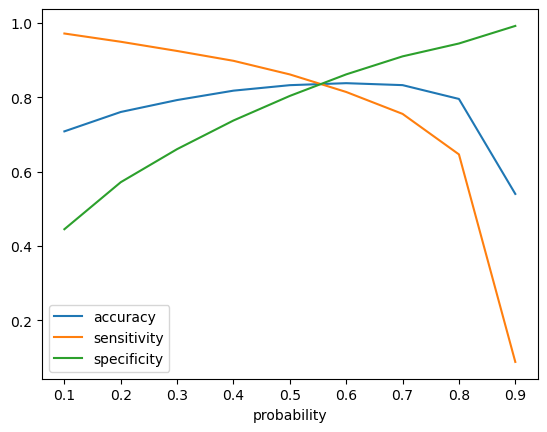

In [110]:
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

#### Observations:

- An intersection point of 0.55 has been identified, suggesting it as the threshold for determining the churn class.

In [111]:
# Identifying class based on the threshold

y_train_pred_df['pred_churn'] = y_train_pred_df.predicted_churn_prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_pred_df.head()

churn  predicted_churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0 0.0000                0.8488    1    1    1    1    1    1    1    1    1   
1 0.0000                0.1435    1    1    0    0    0    0    0    0    0   
2 0.0000                0.1152    1    1    0    0    0    0    0    0    0   
3 0.0000                0.0206    1    0    0    0    0    0    0    0    0   
4 0.0000                0.0008    1    0    0    0    0    0    0    0    0   

   0.9  pred_churn  
0    0           1  
1    0           0  
2    0           0  
3    0           0  
4    0           0

In [112]:
# checking the accuracy score

print("Accuracy on the train data set:",metrics.accuracy_score(y_train_pred_df.churn, y_train_pred_df.pred_churn))

Accuracy on the train data set: 0.8366025166543302


### Prediction on test set

In [113]:
# Scaling the test data

df_test[final_col] = scaler.transform(df_test[final_col])
df_test.head()

id  arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
5662   5,662.0000  0.5559       0.0072        0.3076         0.0000   
37574 37,574.0000  0.7560       0.9339        0.6167         0.0000   
58341 58,341.0000  0.6667       0.5172        0.2720         0.0000   
23282 23,282.0000  0.4502       0.1780        0.2359         0.0000   
30561 30,561.0000  0.4163       0.0563        0.1974         0.0000   

       roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
5662          0.0000            0.0173            0.6014            0.0000   
37574         0.0000            0.0066            0.0097            0.0000   
58341         0.0000            0.0095            0.0583            0.0369   
23282         0.0000            0.2534            0.1091            0.0091   
30561         0.0000            0.0042            0.0081            0.0000   

       loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
5662             0.0000        0.4058            0.0000            0.0119   
37574            0.0000        0.0101            0.0003            0.7034   
58341            0.0000        0.0456            0.5850            0.2780   
23282            0.0000        0.2134            0.0823            0.2074   
30561            0.0000        0.0077            0.0622            0.2223   

       std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  \
5662             0.0000        0.0081        0.0000        0.0159   
37574            0.0000        0.0089        0.0000        0.0000   
58341            0.0000        0.5941        0.0000        0.1088   
23282            0.0000        0.1988        0.0000        0.0362   
30561            0.0000        0.1951        0.0000        0.0000   

       og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  \
5662        0.0000          0.2099            0.0268            0.0461   
37574       0.0000          0.1016            0.0435            0.0281   
58341       0.0000          0.5279            0.0177            0.0691   
23282       0.0000          0.2756            0.5718            0.0106   
30561       0.0000          0.1689            0.0169            0.0084   

       loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
5662             0.0000        0.0425            0.0000            0.0076   
37574            0.0000        0.0376            0.0477            0.2223   
58341            0.0036        0.0544            0.0012            0.0080   
23282            0.1331        0.2708            0.4300            0.3679   
30561            0.0000        0.0129            0.2704            0.0047   

       std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  \
5662             0.0000        0.0052          0.0380        0.0000   
37574            0.1681        0.1850          0.0897        0.0000   
58341            0.0000        0.0059          0.0481        0.0000   
23282            0.0000        0.4224          0.3883        0.0000   
30561            0.0000        0.1111          0.0461        0.0000   

       isd_ic_mou_8  ic_others_8  total_rech_num_8  total_rech_amt_8  \
5662         0.0000       0.0178            0.1591            0.3351   
37574        0.0000       0.0000            0.3182            0.6151   
58341        0.0000       0.0000            0.1591            0.4905   
23282        0.1952       0.0000            0.1818            0.2521   
30561        0.0034       0.0000            0.2045            0.1439   

       max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  max_rech_data_8  \
5662           0.1367              0.2301             0.0000           0.0000   
37574          0.1367              0.2301             0.0000           0.0000   
58341          0.0526              0.0637             0.0000           0.0000   
23282          0.1367              0.2301             0.2308           0.0505   
30561          0.1777              0.0000             0.0000        

In [114]:
# Splitting into X_test and y_test

y_test = df_test.pop('churn')
X_test = df_test

In [115]:
# feature selection using RFE 

X_test=X_test[X_train_rfe.columns]
X_test.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
5662   0.5559         0.0000         0.0000            0.0173   
37574  0.7560         0.0000         0.0000            0.0066   
58341  0.6667         0.0000         0.0000            0.0095   
23282  0.4502         0.0000         0.0000            0.2534   
30561  0.4163         0.0000         0.0000            0.0042   

       loc_og_t2m_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
5662             0.6014            0.0000            0.0119            0.0000   
37574            0.0097            0.0003            0.7034            0.0000   
58341            0.0583            0.5850            0.2780            0.0000   
23282            0.1091            0.0823            0.2074            0.0000   
30561            0.0081            0.0622            0.2223            0.0000   

       loc_ic_t2f_mou_8  std_ic_t2f_mou_8  total_ic_mou_8  spl_ic_mou_8  \
5662             0.0000            0.0000          0.0380        0.0000   
37574            0.0000            0.1681          0.0897        0.0000   
58341            0.0036            0.0000          0.0481        0.0000   
23282            0.1331            0.0000          0.3883        0.0000   
30561            0.0000            0.0000          0.0461        0.0000   

       ic_others_8  total_rech_num_8  last_day_rch_amt_8  count_rech_2g_8  \
5662        0.0178            0.1591              0.2301           0.0000   
37574       0.0000            0.3182              0.2301           0.0000   
58341       0.0000            0.1591              0.0637           0.0000   
23282       0.0000            0.1818              0.2301           0.2500   
30561       0.0000            0.2045              0.0000           0.0000   

       vol_2g_mb_8  vol_3g_mb_8  arpu_3g_8  aug_vbc_3g  total_rech_amt_data_8  
5662        0.0000       0.0000     0.0246      0.0000                 0.0000  
37574       0.0000       0.0000     0.0246      0.0000                 0.0000  
58341       0.0000       0.0000     0.0246      0.0000                 0.0000  
23282       0.0000       0.0000     0.0246      0.0000                 0.0365  
30561       0.0000       0.0000     0.0246      0.0159                 0.0000

In [116]:
# predicting on the test set

# Adding constant to the test model.
X_test_sm = sm.add_constant(X_test)

y_test_pred = res.predict(X_test_sm)

# Converting y_pred to a dataframe which is an array
y_test_pred_df = pd.DataFrame({'churn':y_test,'predicted_churn_prob': y_test_pred})
y_test_pred_df.head()

churn  predicted_churn_prob
5662  0.0000                0.3941
37574 0.0000                0.2173
58341 0.0000                0.5412
23282 0.0000                0.0165
30561 0.0000                0.7135

In [117]:
y_test_pred_df['pred_churn'] = y_test_pred_df.predicted_churn_prob.map( lambda x: 1 if x > 0.55 else 0)

y_test_pred_df.head()

churn  predicted_churn_prob  pred_churn
5662  0.0000                0.3941           0
37574 0.0000                0.2173           0
58341 0.0000                0.5412           0
23282 0.0000                0.0165           0
30561 0.0000                0.7135           1

In [118]:
# checking the accuracy score

print("Accuracy on the test data set:",metrics.accuracy_score(y_test_pred_df.churn, y_test_pred_df.pred_churn))

Accuracy on the test data set: 0.8256662436548223


In [119]:
con_mat_test = metrics.confusion_matrix(y_test_pred_df.churn, y_test_pred_df.pred_churn )
print("Confusion Matrix\n",con_mat_test)

Confusion Matrix
 [[4796  968]
 [ 131  409]]


In [120]:
# evaluating the other metrics on the test set

TP2 = con_mat_test[1,1] # true positive 
TN2 = con_mat_test[0,0] # true negatives
FP2 = con_mat_test[0,1] # false positives
FN2 = con_mat_test[1,0] # false negatives

In [121]:
# printing all the metrics

print("Sensitivity = ",TP2 / float(TP2+FN2))

print("Specificity = ",TN2 / float(TN2+FP2))

print("False Positive Rate = ",FP2/ float(TN2+FP2))

print ("Precision = ",TP2 / float(TP2+FP2))

print ("True Negative Prediction Rate = ",TN2 / float(TN2+FN2))

Sensitivity =  0.7574074074074074
Specificity =  0.8320610687022901
False Positive Rate =  0.16793893129770993
Precision =  0.2970225127087872
True Negative Prediction Rate =  0.9734118124619444


In [122]:
# printing the train and test accuracy scores

print("Accuracy on the train data set:",metrics.accuracy_score(y_train_pred_df.churn, y_train_pred_df.pred_churn))

print("Accuracy on the test data set:",metrics.accuracy_score(y_test_pred_df.churn, y_test_pred_df.pred_churn))

Accuracy on the train data set: 0.8366025166543302
Accuracy on the test data set: 0.8256662436548223


#### Observation: 

- Clearly there is not much difference between train and test data score. So the model built is decent

In [123]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

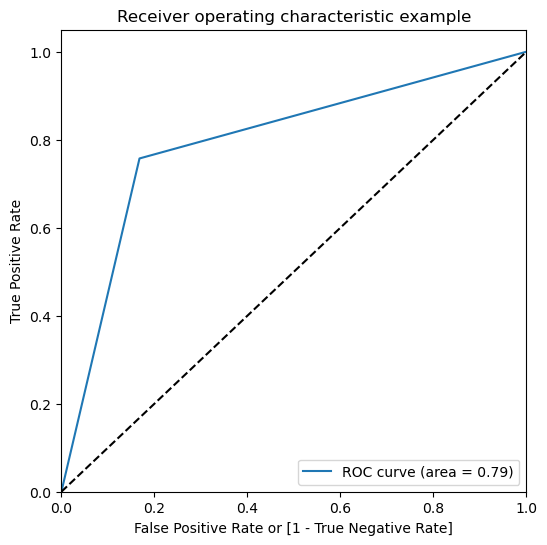

(array([0.        , 0.16793893, 1.        ]),
 array([0.        , 0.75740741, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [124]:
draw_roc(y_test_pred_df.churn, y_test_pred_df.pred_churn)

In [125]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_test_pred_df.churn, y_test_pred_df.pred_churn))

'0.79'

#### We see an overall AUC score of 0.79 looks like we did a decent job.
- But we did spend a lot of effort on the features and their selection.
- We will make use of PCA to reduce our effort

### Logistic Regression with PCA

In [126]:
pca = PCA(random_state=42)

In [127]:
# Looking at the explained variance ratio for each component

pca_train = pca.fit(X_train_rfe)
pca_train.explained_variance_ratio_

array([0.20561486, 0.1235023 , 0.10776486, 0.08286264, 0.06741104,
       0.05519024, 0.04676356, 0.0372105 , 0.03476168, 0.03174949,
       0.0298644 , 0.02857765, 0.02340863, 0.020095  , 0.01879012,
       0.01841395, 0.01523141, 0.01499666, 0.01322949, 0.01284482,
       0.0117167 ])

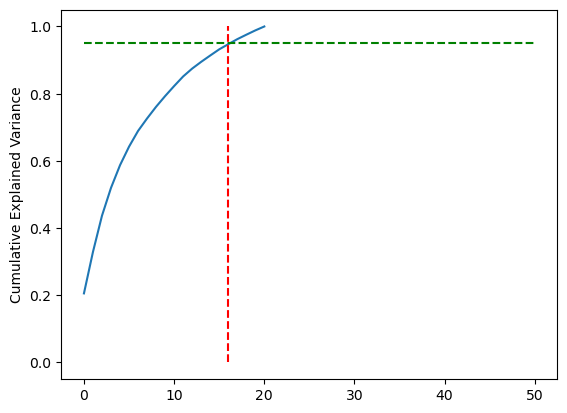

In [128]:
#Making a scree plot for the explained variance

cumvar = np.cumsum(pca_train.explained_variance_ratio_)
plt.plot(range(len(cumvar)), cumvar)
plt.hlines(y=0.95, xmax=50, xmin=0, colors="g", linestyles="--")
plt.vlines(x=16, ymax=1, ymin=0, colors="r", linestyles="--")
plt.ylabel("Cumulative Explained Variance")
plt.show()


**Perform PCA with 16 components**

In [129]:
# Fitting PCA on train data set

from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=16)
df_train_pca = pca_final.fit_transform(X_train_rfe)
df_train_pca.shape

(27020, 16)

In [130]:
# Calculating correlation matrix

corrmat = np.corrcoef(df_train_pca.transpose())

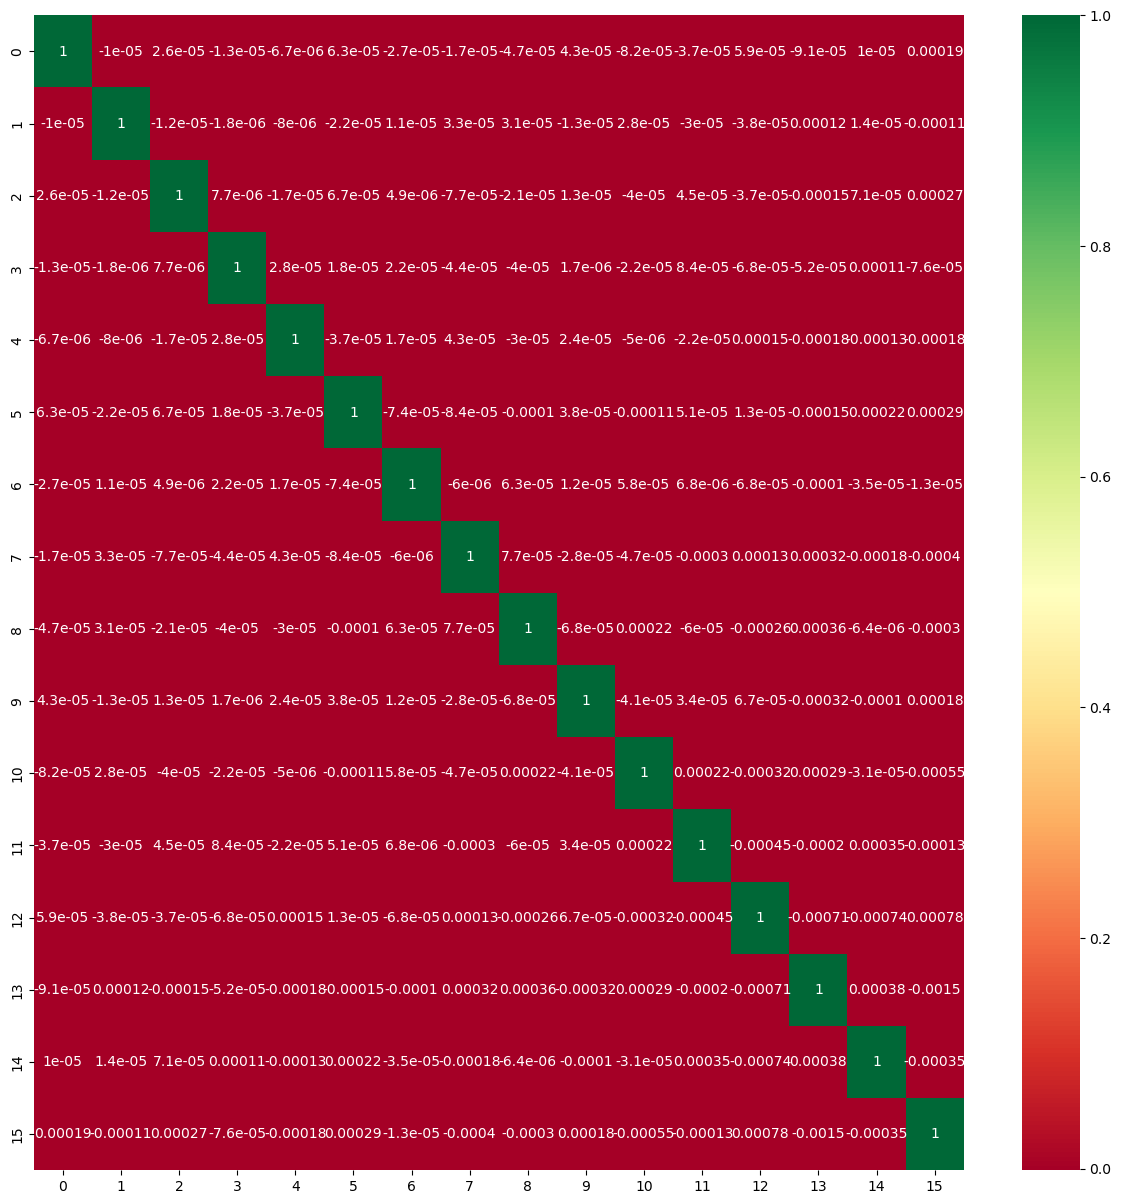

In [131]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True, cmap='RdYlGn')
plt.show()

### Observation:

- CLearly all the PCA component are not correlated to each other

In [132]:
# Fitting PCA on test data

df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(6304, 16)

### Logistic Regression with PCA on test data

In [133]:
# Initiating Logistic Regression and fit on the train data

churn_pca = LogisticRegression()
model_pca = churn_pca.fit(df_train_pca, y_train)

In [134]:
# Predicting on test data

PCA_Pred_test = model_pca.predict_proba(df_test_pca)

In [135]:
# Accuracy score on test data

round((metrics.roc_auc_score(y_test, PCA_Pred_test[:,1])),2)

0.87

#### Observation:

- Accuracy on test data is improved from 82% to 87%. This is a significant improvment with PCA

 ## Decision Trees

In [136]:
# Initiating Decision tree

dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [137]:
# Fitting on train data

dt_base.fit(X_train_rfe, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [138]:
# Predicting on traina and test data sets

y_train_pred = dt_base.predict(X_train_rfe)
y_test_pred = dt_base.predict(X_test)

In [139]:
# Calculating classification report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92      5764
         1.0       0.36      0.74      0.49       540

    accuracy                           0.87      6304
   macro avg       0.67      0.81      0.70      6304
weighted avg       0.92      0.87      0.89      6304



#### Hyper-parameter tuning for the Decision Tree

In [140]:
# Initiating Decision tree

dt = DecisionTreeClassifier(random_state=42)

In [141]:
# Create the parameter grid based on the results of random search 

params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [142]:
# Identifying best parameters

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [143]:
%%time
grid_search.fit(X_train_rfe, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: total: 4.88 s
Wall time: 47.4 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [144]:
grid_search.best_score_

0.9114729829755737

In [145]:
# Creating decision tree object with best parameters

dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [146]:
from sklearn.metrics import accuracy_score

In [147]:
# printing the train and test scores

print("Train Accuracy :", accuracy_score(y_train, dt_best.predict(X_train_rfe)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, dt_best.predict(X_train_rfe)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, dt_best.predict(X_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, dt_best.predict(X_test)))

Train Accuracy : 0.9635455218356773
Train Confusion Matrix:
[[12962   548]
 [  437 13073]]
--------------------------------------------------
Test Accuracy : 0.8894352791878173
Test Confusion Matrix:
[[5263  501]
 [ 196  344]]


#### Observation:

- CLearly there is a great improvement in accuracy on train and test set compared to logistic regression and logistc regression with PCA

In [148]:
# Evaluating the various metrics using the confusion matrix

con_mat_1 = confusion_matrix(y_train, dt_best.predict(X_train_rfe))

TP1 = con_mat_1[1,1] # true positive 
TN1 = con_mat_1[0,0] # true negatives
FP1 = con_mat_1[0,1] # false positives
FN1 = con_mat_1[1,0] # false negatives

In [149]:
# printing all the metrics

print("Sensitivity = ",TP1 / float(TP1+FN1))

print("Specificity = ",TN1 / float(TN1+FP1))

print("False Positive Rate = ",FP1/ float(TN1+FP1))

print ("Precision = ",TP1 / float(TP1+FP1))

print ("True Negative Prediction Rate = ",TN1 / float(TN1+FN1))

Sensitivity =  0.9676535899333827
Specificity =  0.9594374537379718
False Positive Rate =  0.040562546262028126
Precision =  0.9597680052859555
True Negative Prediction Rate =  0.9673856257929696


In [150]:

dt_importance_df = pd.DataFrame({"Column": X_train_rfe.columns, "Importance": dt_best.feature_importances_
})

In [151]:
dt_importance_df.sort_values(by="Importance", ascending=False)

Column  Importance
10         total_ic_mou_8      0.4505
2           roam_og_mou_8      0.1632
20  total_rech_amt_data_8      0.0658
6        std_og_t2m_mou_8      0.0392
14     last_day_rch_amt_8      0.0392
0                  arpu_8      0.0356
13       total_rech_num_8      0.0347
1           roam_ic_mou_8      0.0232
5        std_og_t2t_mou_8      0.0209
3        loc_og_t2t_mou_8      0.0208
4        loc_og_t2m_mou_8      0.0198
8        loc_ic_t2f_mou_8      0.0186
15        count_rech_2g_8      0.0155
17            vol_3g_mb_8      0.0122
19             aug_vbc_3g      0.0097
9        std_ic_t2f_mou_8      0.0085
16            vol_2g_mb_8      0.0083
18              arpu_3g_8      0.0064
7        std_og_t2f_mou_8      0.0029
11           spl_ic_mou_8      0.0026
12            ic_others_8      0.0023

## Random Forest

### Hyper-parameter tuning for the Random Forest

In [152]:
# Initiating Random forest object

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [153]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [154]:
# Identify best set of parameters

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [155]:
%%time
grid_search.fit(X_train_rfe, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: total: 30.2 s
Wall time: 4min 46s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [156]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [157]:
rf_importance_df = pd.DataFrame({"Column": X_train_rfe.columns, "Importance": rf_best.feature_importances_
})

In [158]:
rf_importance_df.sort_values(by="Importance", ascending=False)

Column  Importance
10         total_ic_mou_8      0.1786
0                  arpu_8      0.1024
2           roam_og_mou_8      0.0993
4        loc_og_t2m_mou_8      0.0892
14     last_day_rch_amt_8      0.0858
1           roam_ic_mou_8      0.0805
3        loc_og_t2t_mou_8      0.0538
8        loc_ic_t2f_mou_8      0.0479
13       total_rech_num_8      0.0439
20  total_rech_amt_data_8      0.0395
15        count_rech_2g_8      0.0341
16            vol_2g_mb_8      0.0289
6        std_og_t2m_mou_8      0.0277
5        std_og_t2t_mou_8      0.0195
19             aug_vbc_3g      0.0183
17            vol_3g_mb_8      0.0168
18              arpu_3g_8      0.0096
9        std_ic_t2f_mou_8      0.0088
12            ic_others_8      0.0069
11           spl_ic_mou_8      0.0054
7        std_og_t2f_mou_8      0.0030

In [159]:
# printing the train and test scores

print("Train Accuracy :", accuracy_score(y_train, rf_best.predict(X_train_rfe)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, rf_best.predict(X_train_rfe)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, rf_best.predict(X_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, rf_best.predict(X_test)))

Train Accuracy : 0.9706883789785344
Train Confusion Matrix:
[[12979   531]
 [  261 13249]]
--------------------------------------------------
Test Accuracy : 0.9148159898477157
Test Confusion Matrix:
[[5400  364]
 [ 173  367]]


#### Observation:

- There is an improvement on accuracy scores on train and test data set when compared to Decision tree model

In [160]:
# Evaluating the various metrics using the confusion matrix

con_mat_2 = confusion_matrix(y_train, dt_best.predict(X_train_rfe))

TP2 = con_mat_2[1,1] # true positive 
TN2 = con_mat_2[0,0] # true negatives
FP2 = con_mat_2[0,1] # false positives
FN2 = con_mat_2[1,0] # false negatives

In [161]:
# printing all the metrics

print("Sensitivity = ",TP2 / float(TP2+FN2))

print("Specificity = ",TN2 / float(TN2+FP2))

print("False Positive Rate = ",FP2/ float(TN2+FP2))

print ("Precision = ",TP2 / float(TP2+FP2))

print ("True Negative Prediction Rate = ",TN2 / float(TN2+FN2))

Sensitivity =  0.9676535899333827
Specificity =  0.9594374537379718
False Positive Rate =  0.040562546262028126
Precision =  0.9597680052859555
True Negative Prediction Rate =  0.9673856257929696


## Conclusions:

- The random forest model has been selected as the most suitable for analysis due to its superior accuracy score compared to other models.
- Average revenue per person in the 8th month is the most import predictor of churn
- Notably, incoming calls, outgoing calls particularly while in roaming, emerge as significant predictors of churn. This underscores the importance for the telecom company to design plans aimed at enhancing the incoming calls and outgoing experience and to refine offerings tailored for customers using roaming services.
- The accuracy scores of the chosen random forest model are impressive, with a training accuracy of approximately 97% and a test accuracy of around 91.5%.

## Prediction on test data using Randforest model

In [162]:
# extracting the id column 

test_id = test_data['id']

In [163]:
# Dropping id from the test data
 
test_data = test_data.drop('id', axis=1)

In [164]:
# Deriving new column tenure based on aon column

test_data['tenure'] = (test_data['aon']/30).round(0)
test_data.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  91.8820  65.3300  64.4450      31.7800      20.2300      23.1100   
1 414.1680 515.5680 360.8680      75.5100      41.2100      19.8400   
2 329.8440 434.8840 746.2390       7.5400       7.8600       8.4000   
3  43.5500 171.3900  24.4000       5.3100       2.1600       0.0000   
4 306.8540 406.2890 413.3290     450.9300     609.0300     700.6800   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0       60.1600       32.1600       34.8300         0.0000         0.0000   
1      474.3400      621.8400      394.9400         0.0000         0.0000   
2       16.9800       45.8100       45.0400        22.8100       103.3800   
3       40.0400      205.0100       24.0100         0.0000         0.0000   
4       60.9400       23.8400       74.1600         0.0000         0.0000   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0         0.0000         0.0000         0.0000         0.0000   
1         0.0000         0.0000         0.0000         0.0000   
2        26.0800        24.5300        53.6800        54.4400   
3         0.0000         0.0000         0.0000         0.0000   
4         0.0000         0.0000         0.0000         0.0000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0           24.8800           20.2300           21.0600           18.1300   
1           75.5100           41.2100           19.8400          473.6100   
2            0.0000            0.0000            0.0000            0.0000   
3            5.3100            0.0000            0.0000            2.9400   
4            0.4500            0.7800           14.5600            2.3900   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0           10.8900            8.3600            0.0000           13.5800   
1          598.0800          377.2600            0.7300            0.0000   
2            0.0000            0.0000            0.0000            0.0000   
3           98.6100           20.5100            0.0000            0.0000   
4            2.6600           10.9400            0.0000            0.0000   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0            0.0000            0.0000            0.0000            0.0300   
1            0.0000            0.0000            0.0000            0.0000   
2            0.0000            0.0000            0.0000            0.0000   
3            2.3500            0.0000            6.1800            0.0000   
4            0.0000            0.0000            0.0000            0.0000   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0       43.0100       44.7100       29.4300            6.9000   
1      549.8600      639.2900      397.1100            0.0000   
2        0.0000        0.0000        0.0000            0.0000   
3        8.2600       98.6100       22.8600            0.0000   
4        2.8400        3.4400       25.5100          450.4800   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            0.0000            2.0500           42.0300            7.6800   
1            0.0000            0.0000            0.0000           23.7600   
2            0.0000            0.0000            0.0000            0.0000   
3            2.1600            0.0000           37.0900           94.3600   
4          608.2400          686.1100           58.5400           21.1800   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0           26.4300            0.0000            0.0000            0.0000   
1           17.6800            0.0000            0.0000            0.0000   
2            0.0000            0.0000            0.0000            0.0000   
3            0.0000            0.0000            0.0000            0.0000   
4           63.1800            0.0000            0.0000            0.0000   

   std_og_mou_6  

In [165]:
# Applyinbg preprocessing steps on test data similar to what had been applied on train data

test_data.filter(regex='_6|_7')

arpu_6   arpu_7  onnet_mou_6  onnet_mou_7  offnet_mou_6  \
0        91.8820  65.3300      31.7800      20.2300       60.1600   
1       414.1680 515.5680      75.5100      41.2100      474.3400   
2       329.8440 434.8840       7.5400       7.8600       16.9800   
3        43.5500 171.3900       5.3100       2.1600       40.0400   
4       306.8540 406.2890     450.9300     609.0300       60.9400   
...          ...      ...          ...          ...           ...   
29995   718.8700 396.2590     324.4600     250.0100      190.3600   
29996   218.3270 324.0700     263.7900     467.2400      108.5300   
29997   139.4730  38.2300      11.0800      14.8900       37.2400   
29998 1,122.9120 781.1210     122.7400      50.2300    1,854.0900   
29999   318.9800 307.8900      28.0900      32.9300      107.7800   

       offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  \
0           32.1600         0.0000         0.0000         0.0000   
1          621.8400         0.0000         0.0000         0.0000   
2           45.8100        22.8100       103.3800        24.5300   
3          205.0100         0.0000         0.0000         0.0000   
4           23.8400         0.0000         0.0000         0.0000   
...             ...            ...            ...            ...   
29995      166.1400        87.7600        14.7800       112.4300   
29996      124.1100         3.4000         0.0000         8.2900   
29997       16.7400         0.0000         0.0000         0.0000   
29998    1,088.8300         0.0000        21.6600         0.0000   
29999      241.5300       134.5400        67.7900       129.8300   

       roam_og_mou_7  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  \
0             0.0000           24.8800           20.2300           18.1300   
1             0.0000           75.5100           41.2100          473.6100   
2            53.6800            0.0000            0.0000            0.0000   
3             0.0000            5.3100            0.0000            2.9400   
4             0.0000            0.4500            0.7800            2.3900   
...              ...               ...               ...               ...   
29995         8.4600          214.9900          233.9600          161.7600   
29996         0.0000            5.0800           17.3300           22.4400   
29997         0.0000           11.0800            6.6600           22.9300   
29998        26.9400            1.0600            4.8100           58.1600   
29999        81.7400            0.0000            5.0900            0.0000   

       loc_og_t2m_mou_7  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  \
0               10.8900            0.0000           13.5800            0.0000   
1              598.0800            0.7300            0.0000            0.0000   
2                0.0000            0.0000            0.0000            0.0000   
3               98.6100            0.0000            0.0000            0.0000   
4                2.6600            0.0000            0.0000            0.0000   
...                 ...               ...               ...               ...   
29995          158.1900           12.0900            2.5100            0.0000   
29996           33.6300            0.0000            0.6600            0.0000   
29997            8.2400            0.0000            0.0000            0.0000   
29998           80.6800            0.0000            0.0000            8.9800   
29999           12.0900            0.0000            0.0000            0.0000   

       loc_og_t2c_mou_7  loc_og_mou_6  loc_og_mou_7  std_og_t2t_mou_6  \
0                0.0000       43.0100       44.7100            6.9000   
1                0.0000      549.8600      639.2900            0.0000   
2                0.0000        0.0000        0.0000            0.0000   
3                6.1800        8.2600       98.6100            0.0000   
4                0.0000        2.8400        3.4400          450.4800   
...             

In [166]:
# Filering columns that ends with 6 or 7

col_list = test_data.filter(regex='_6|_7').columns.str[:-2]
col_list

Index(['arpu', 'arpu', 'onnet_mou', 'onnet_mou', 'offnet_mou', 'offnet_mou',
       'roam_ic_mou', 'roam_ic_mou', 'roam_og_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2m_mou',
       'loc_og_t2f_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2t_mou',
       'std_og_t2m_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_t2f_mou',
       'std_og_mou', 'std_og_mou', 'isd_og_mou', 'isd_og_mou', 'spl_og_mou',
       'spl_og_mou', 'og_others', 'og_others', 'total_og_mou', 'total_og_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2m_mou',
       'loc_ic_t2f_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'loc_ic_mou',
       'std_ic_t2t_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2m_mou',
       'std_ic_t2f_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'std_ic_mou',
       'total_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'spl_ic_mou',
       'isd_ic_mou', 'isd

In [167]:
# Calculating avegare of 6th and 7th months for all the columns

for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_6 & 7"
    col_6 = col+"_6"
    col_7 = col+"_7"
    test_data[avg_col_name] = (test_data[col_6]  + test_data[col_7])/ 2

In [168]:
# Dropping the columns that are not required

col_list_to_drop = test_data.filter(regex='_6|_7')
test_data.drop(col_list_to_drop,axis=1,inplace=True)

In [169]:
test_data.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0  64.4450      23.1100       34.8300         0.0000         0.0000   
1 360.8680      19.8400      394.9400         0.0000         0.0000   
2 746.2390       8.4000       45.0400        26.0800        54.4400   
3  24.4000       0.0000       24.0100         0.0000         0.0000   
4 413.3290     700.6800       74.1600         0.0000         0.0000   

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0           21.0600            8.3600            0.0000            0.0300   
1           19.8400          377.2600            0.0000            0.0000   
2            0.0000            0.0000            0.0000            0.0000   
3            0.0000           20.5100            2.3500            0.0000   
4           14.5600           10.9400            0.0000            0.0000   

   loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0       29.4300            2.0500           26.4300            0.0000   
1      397.1100            0.0000           17.6800            0.0000   
2        0.0000            0.0000            0.0000            0.0000   
3       22.8600            0.0000            0.0000            0.0000   
4       25.5100          686.1100           63.1800            0.0000   

   std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0       28.4800        0.0000        0.0300       0.0000         57.9400   
1       17.6800        0.8000        0.0000       0.0000        415.5900   
2        0.0000        0.0000        0.0000       0.0000          0.0000   
3        0.0000        0.0000        1.1500       0.0000         24.0100   
4      749.2900        0.0000        4.9600       0.0000        779.7800   

   loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0           21.9800            9.5300            0.0000       31.5100   
1            2.6100          184.8100            0.0000      187.4300   
2            0.0000            0.0000            0.0000        0.0000   
3           23.0400          506.9400            1.6400      531.6400   
4            9.9100            7.6900            0.0000       17.6100   

   std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0            0.0000            4.3400            0.0000        4.3400   
1            0.0000            0.0000            0.0000        0.0000   
2            0.0000            0.0000            0.0000        0.0000   
3            0.0000            8.8300            0.0000        8.8300   
4          107.3900           32.4600            1.6100      141.4800   

   total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0         36.2600        0.3900        0.0000       0.0000                 4   
1        281.6600        0.0000       94.2300       0.0000                 5   
2          0.0000        0.0000        0.0000       0.0000                 5   
3        549.1300        0.0000        8.6500       0.0000                 2   
4        159.2600        0.0000        0.0000       0.1600                 8   

   total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
0                60              30                   0             0.0000   
1               500             250                   0             0.0000   
2              1000             500                   0             0.0000   
3                 0               0                   0             0.0000   
4               546             130                 130             0.0000   

   max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  \
0           0.0000           0.0000           0.0000              0.0000   
1           0.0000           0.0000           0.0000              0.0000   
2           0.0000           0.0000           0.0000              0.0000   
3           0.0000           0.0000           0.0000              0.0000   
4         

In [170]:
# Extracting RFE columns from the test data

test_data_1 = test_data[X_train_rfe.columns]

In [171]:
# Predicting chur on test data set using random forest model

rf_predict = rf_best.predict(test_data_1)
rf_predict

array([0., 0., 1., ..., 0., 0., 0.])

In [172]:
# Converting the results into the dataframe

final_test_prediction = pd.DataFrame({'id':test_id,'churn_probability':rf_predict})

final_test_prediction.head()

id  churn_probability
0  69999             0.0000
1  70000             0.0000
2  70001             1.0000
3  70002             0.0000
4  70003             0.0000

In [173]:
# Converiting the data type of the churn_probability to int

final_test_prediction.churn_probability = final_test_prediction.churn_probability.astype('int')

In [174]:
final_test_prediction.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [175]:
final_test_prediction.shape

(30000, 2)

In [176]:
# Writing the prediction to the csv file

final_test_prediction.to_csv('submission.csv',index=False)